In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Files/2023-2024 NBA Player Stats - Regular.csv', encoding='latin1', sep=';')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


**Descrição das Colunas**

Rk : Rank
<br>
Player : Player's name
<br>
Pos : Position
<br>
Age : Player's age
<br>
Tm : Team
<br>
G : Games played
<br>
GS : Games started
<br>
MP : Minutes played per game
<br>
FG : Field goals per game
<br>
FGA : Field goal attempts per game
<br>
FG% : Field goal percentage
<br>
3P : 3-point field goals per game
<br>
3PA : 3-point field goal attempts per game
<br>
3P% : 3-point field goal percentage
<br>
2P : 2-point field goals per game
<br>
2PA : 2-point field goal attempts per game
<br>
2P% : 2-point field goal percentage
<br>
eFG% : Effective field goal percentage
<br>
FT : Free throws per game
<br>
FTA : Free throw attempts per game
<br>
FT% : Free throw percentage
<br>
ORB : Offensive rebounds per game
<br>
DRB : Defensive rebounds per game
<br>
TRB : Total rebounds per game
<br>
AST : Assists per game
<br>
STL : Steals per game
<br>
BLK : Blocks per game
<br>
TOV : Turnovers per game
<br>
PF : Personal fouls per game
<br>
PTS : Points per game

In [ ]:
data.shape

(735, 30)

Alguns jogadores jogaram por mais de uma equipe nessa temporada e por isso seus nomes se repetem dentro do dataset, para isso iremos retirar a repetição desses nomes e deixar esses jogadores no time "TOT" que representa a junção das estatísticas desses jogadores durante toda a temporada.![Est.1.5.png](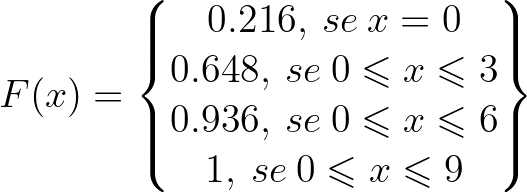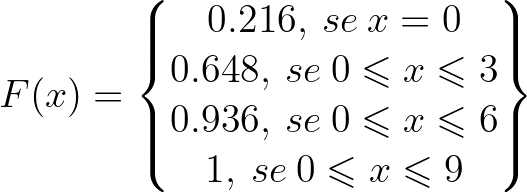)

In [ ]:
# Limpando a repetição de jogadores e deixando apenas um jogador por time
players_repeat = data['Player'].value_counts()[data['Player'].value_counts() > 1].index.values
index_array = []
for i in range(len(data)):
  if data['Player'][i] in players_repeat and data['Tm'][i] != 'TOT':
    index_array.append(data.loc[i].name)
data = data.drop(index_array)
data.reset_index(drop=True, inplace=True)

In [ ]:
len(data['Player'].unique()) == len(data)

True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      572 non-null    int64  
 1   Player  572 non-null    object 
 2   Pos     572 non-null    object 
 3   Age     572 non-null    int64  
 4   Tm      572 non-null    object 
 5   G       572 non-null    int64  
 6   GS      572 non-null    int64  
 7   MP      572 non-null    float64
 8   FG      572 non-null    float64
 9   FGA     572 non-null    float64
 10  FG%     572 non-null    float64
 11  3P      572 non-null    float64
 12  3PA     572 non-null    float64
 13  3P%     572 non-null    float64
 14  2P      572 non-null    float64
 15  2PA     572 non-null    float64
 16  2P%     572 non-null    float64
 17  eFG%    572 non-null    float64
 18  FT      572 non-null    float64
 19  FTA     572 non-null    float64
 20  FT%     572 non-null    float64
 21  ORB     572 non-null    float64
 22  DR

## **1° Questão**

### **Probabilidade Simples - Qual a probabilidade de escolher um jogador aleatóriamente e ele ser da posição de Center?**

In [ ]:
n_centers =len(data[data['Pos'] == 'C'])
print(f'Na liga temos {n_centers} Centers')

Na liga temos 94 Centers


In [ ]:
probabilidade_center = (n_centers / len(data))
print(f'A probabilidade de um jogador selecionado aleatóriamente jogar na posição de Center é de: {round(probabilidade_center*100, 2)}%')

A probabilidade de um jogador selecionado aleatóriamente jogar na posição de Center é de: 16.43%


### **Probabilidade Condicional - P(Center|Rebotes>=8)**

**Qual a probablidade de que se um center for escolhido ele possua mais de 8 rebotes por partida?**

In [ ]:
data_c = data[data['Pos'] == 'C']

In [ ]:
n_centers

94

In [ ]:
c_rb8 = len(data_c[data_c['TRB'] >= 8]) # Número de centers com mais de 8 rebores por partida
p_center_rb8 = c_rb8 / len(data) # Probabilidade de aleatoriamente selecionar um Center com mais de 8 rebotes por partida
p_center_rb8

0.04020979020979021

In [ ]:
c_rb8

23

In [ ]:
p = p_center_rb8 / probabilidade_center
print(f'A probabilidade de selecionar um center com mais de 8 rebotes por partida sabendo que um Center foi selecionado é de: {round(p*100, 2)}%')

A probabilidade de selecionar um center com mais de 8 rebotes por partida sabendo que um Center foi selecionado é de: 24.47%


### **Probabilidade com o teorema de Bayes**

Nikola Jokic 06/03/2024 - 4/7 (57,1%)

Nikola Jokic em 34/79(43,04%) teve 3P% > 37%

Probablidade de um excelente arremessador arremessar mais 0.37 é de 59,46%

Nikola Jokic, Pivô do Denver Nuggets, conseguiu, em um  jogo contra o Phoenix Suns, uma eficiência de 57,1% arremessando do perímetro.
Qual a probabilidade de Nikola ser um grande arremessador de 3pts?


In [ ]:
# data[(data['3PA'] >=5) & (data['3P%'] >=0.37)].sort_values(by='3P%', ascending=False)

In [ ]:
p_3p_excel = len(data[(data['3PA'] >=4.5) & (data['3P%'] >=0.37)].sort_values(by='3P%', ascending=False)) / len(data)
p_3p_excel

0.12237762237762238

In [ ]:
round(((0.5946 * p_3p_excel) / 0.4304) * 100, 2)

16.91

### **Variáveis Aleatórias**

Steve Kerr, técnico do Golden State Warriors, pede para os jogadores assumirem a tática 'Curry Ball' que é preparar pick n rolls e setar screens para que Stephen Curry arremesse apenas do perímetro, ou seja, atrás da linha dos 3pts. Representaremos os próximos 3 arremessos de curry e a probabliidade dos eventos.

A quantidade de pontos que Curry fizer nesses 3 arremessos é a nossa variável aleatória, que pode ser (0, 3, 6, 9)

In [ ]:
chance_acerto = data[data['Player'] == 'Stephen Curry']['3P%'].iloc[0]
chance_erro = 1 - chance_acerto


**P(0 Pts) = P(X,X,X)**

In [ ]:
chance_acerto, chance_erro

(0.408, 0.5920000000000001)

In [ ]:
p_0 = chance_erro**3

In [ ]:
print(f'Chance de curry marcar nenhum ponto é de {round(p_0, 4)*100}%')

Chance de curry marcar nenhum ponto é de 20.75%


**P(3 Pts) = P(O,X,X), (X, O, X), (X, X, O)**

In [ ]:
p_3 = (chance_acerto * (chance_erro**2)) * 3

In [ ]:
print(f'Chance de curry marcar 3 pontos é de {round(p_3, 4)*100}%')

Chance de curry marcar 3 pontos é de 42.9%


**P(6 Pts) = P(O,O,X), (O, X, O), (X, O, O)**

In [ ]:
p_6 = ((chance_acerto**2) * chance_erro)*3

In [ ]:
print(f'Chance de curry marcar 6 pontos é de {round(p_6, 4)*100}%')

Chance de curry marcar 6 pontos é de 29.56%


**P(9 Pts) = P(O,O,O)**

In [ ]:
p_9 = chance_acerto**3

In [ ]:
print(f'Chance de curry marcar 6 pontos é de {round(p_9, 4)*100}%')

Chance de curry marcar 6 pontos é de 6.79%


**P(Y=0) = P(X, X, X) = 0.2075**

**P(Y=3) = P{(O,X,X),(X,O,X),(X,X,O)} = 0.4290**

**P(Y=6) = P{(O,O,X),(O,X,O),(X,O,O)} = 0.2956**

**P(Y=9) - P(O,O,O) = 0.0679**

**P(Y=0) + P(Y=3) + P(Y=6) + P(Y=9) = 1**

### **Função Repartição**

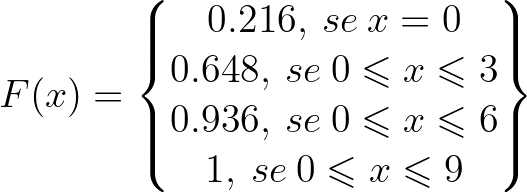

## **2° Questão**

### **Boxplot**

Os jogadores que jogaram em mais de um time, alguns jogaram em posições diferente o que cria novas posições mistas, valores únicos para esses casos, vamos modificar esses valores e colocar apenas uma posição

In [ ]:
sns.set_theme()

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
for i in range(len(data)):
  if '-' in data['Pos'][i]:
    data.iat[i,2] = data.iat[i,2].split('-')[0]

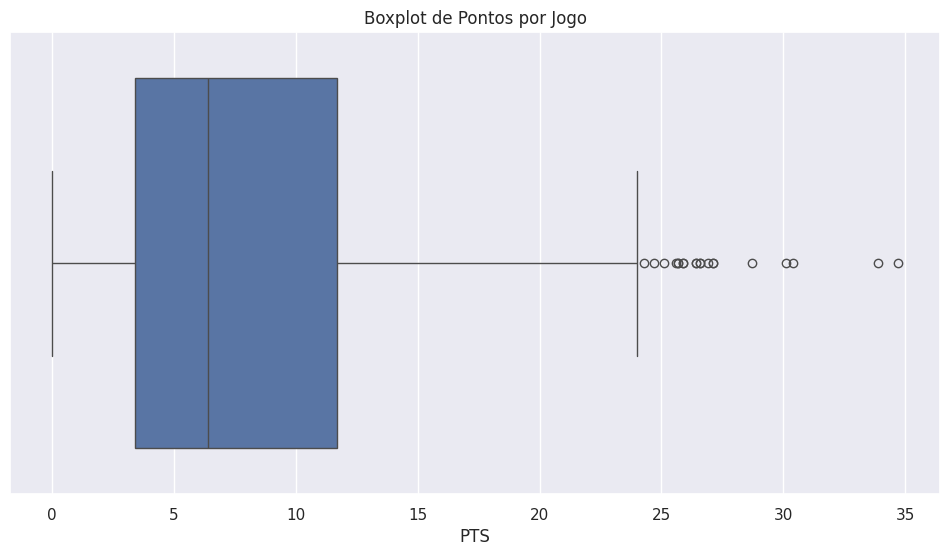

In [ ]:
ax = sns.boxplot(data=data, x='PTS')
ax.set_title('Boxplot de Pontos por Jogo')
ax.figure.set_size_inches(12, 6)

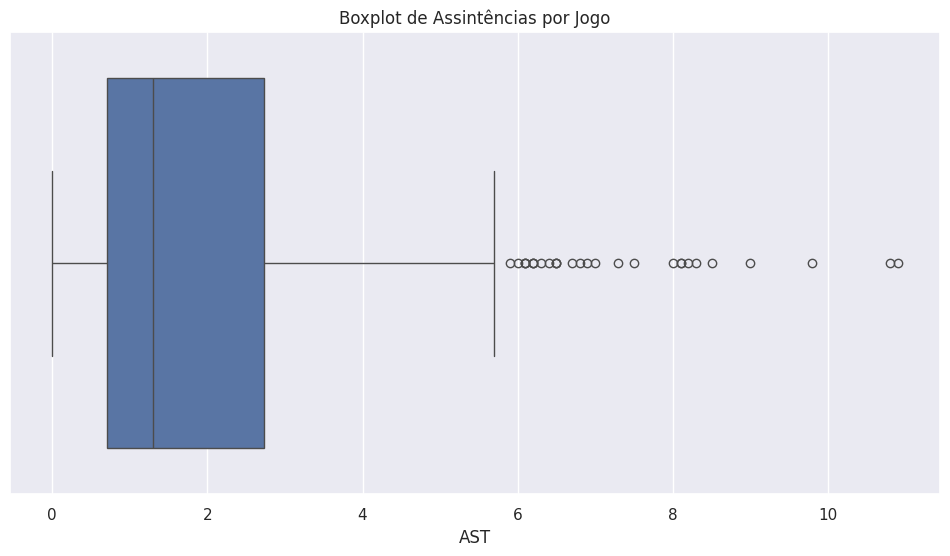

In [ ]:
ax = sns.boxplot(data=data, x='AST')
ax.set_title('Boxplot de Assintências por Jogo')
ax.figure.set_size_inches(12, 6)

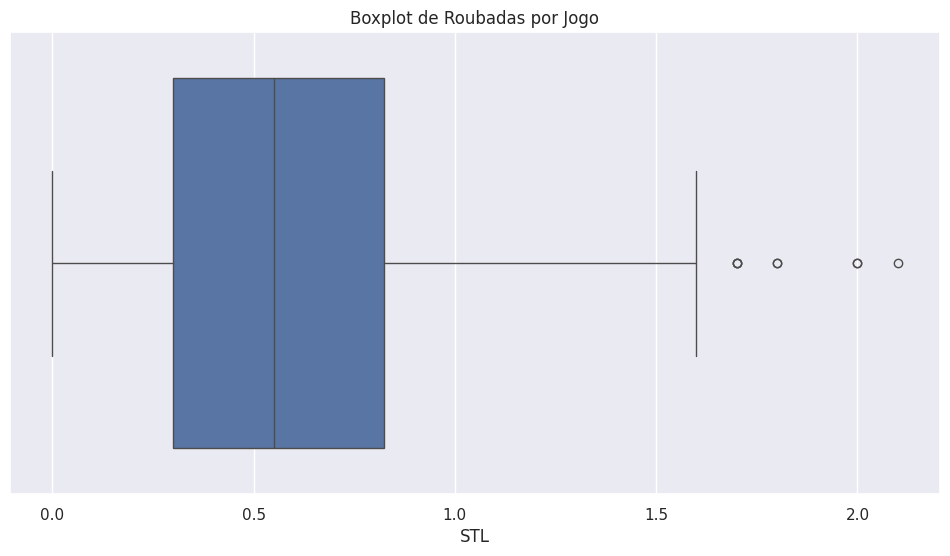

In [ ]:
ax = sns.boxplot(data=data, x='STL')
ax.set_title('Boxplot de Roubadas por Jogo')
ax.figure.set_size_inches(12, 6)

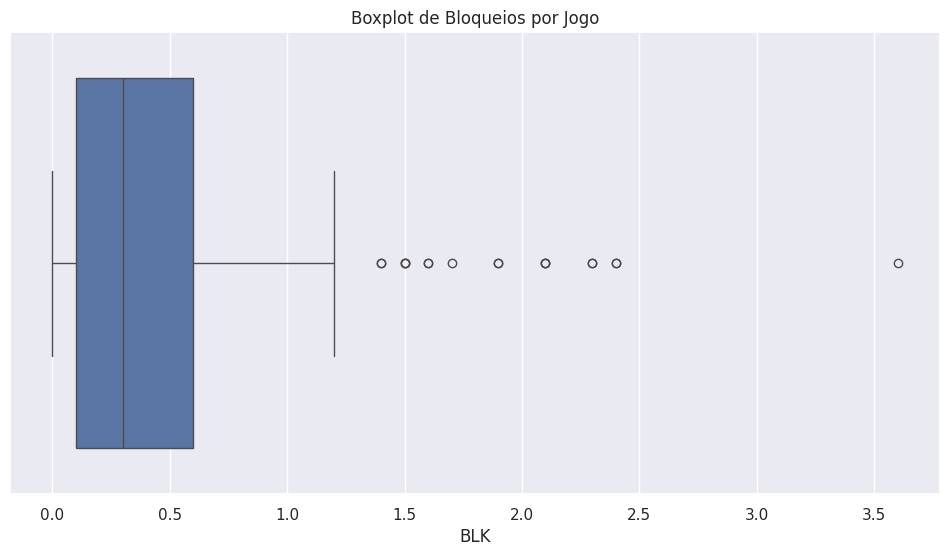

In [ ]:
ax = sns.boxplot(data=data, x='BLK')
ax.set_title('Boxplot de Bloqueios por Jogo')
ax.figure.set_size_inches(12, 6)

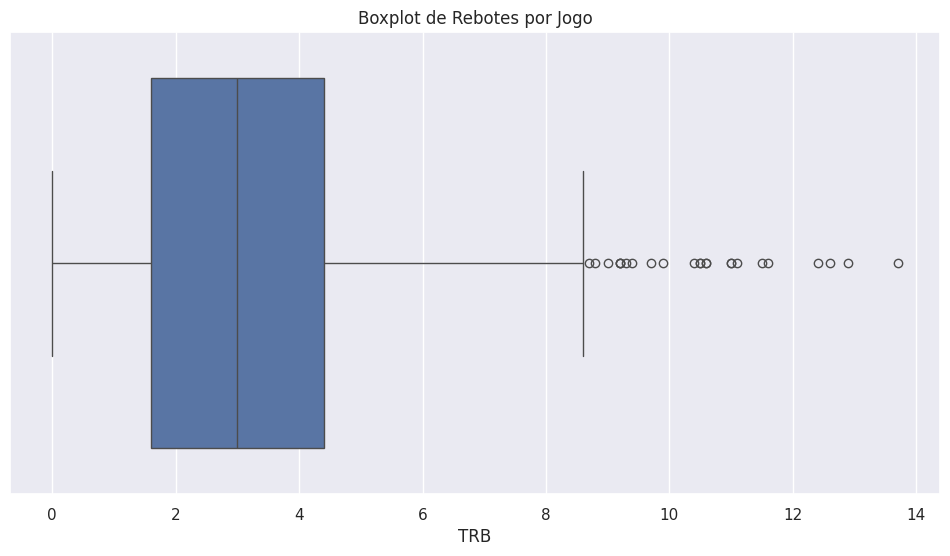

In [ ]:
ax = sns.boxplot(data=data, x='TRB')
ax.set_title('Boxplot de Rebotes por Jogo')
ax.figure.set_size_inches(12, 6)

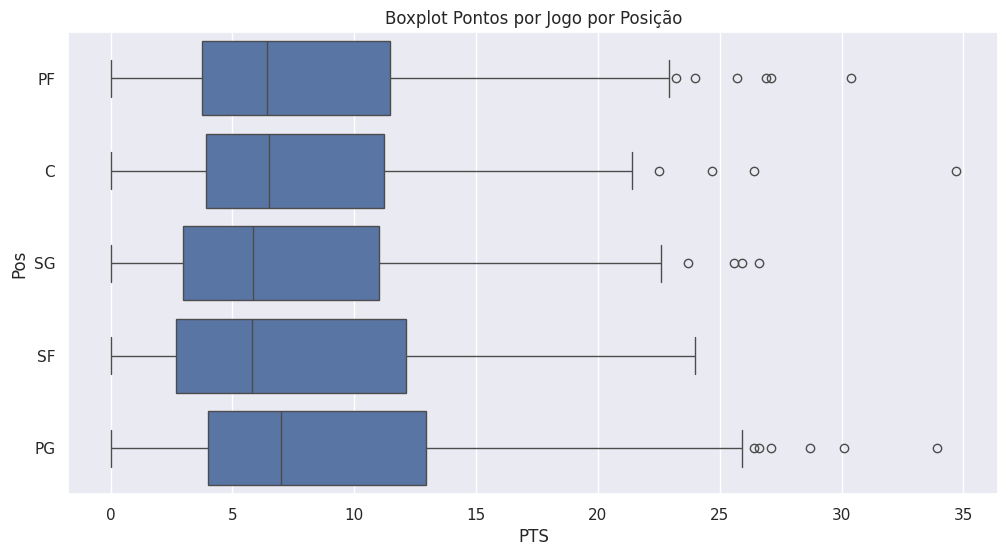

In [ ]:
ax = sns.boxplot(data=data, x='PTS', y='Pos')
ax.set_title('Boxplot Pontos por Jogo por Posição')
ax.figure.set_size_inches(12,6)

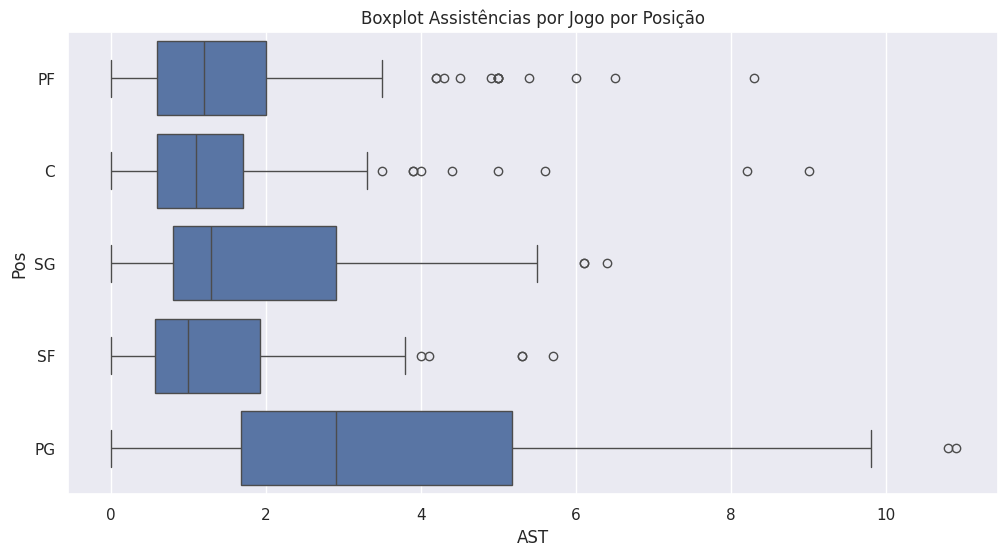

In [ ]:
ax = sns.boxplot(data=data, x='AST', y='Pos')
ax.set_title('Boxplot Assistências por Jogo por Posição')
ax.figure.set_size_inches(12,6)

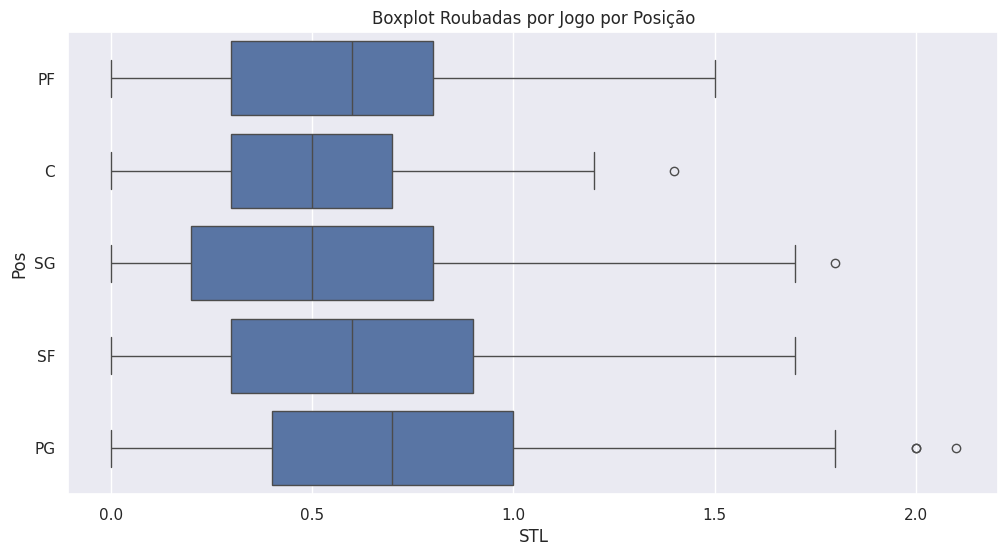

In [ ]:
ax = sns.boxplot(data=data, x='STL', y='Pos')
ax.set_title('Boxplot Roubadas por Jogo por Posição')
ax.figure.set_size_inches(12,6)

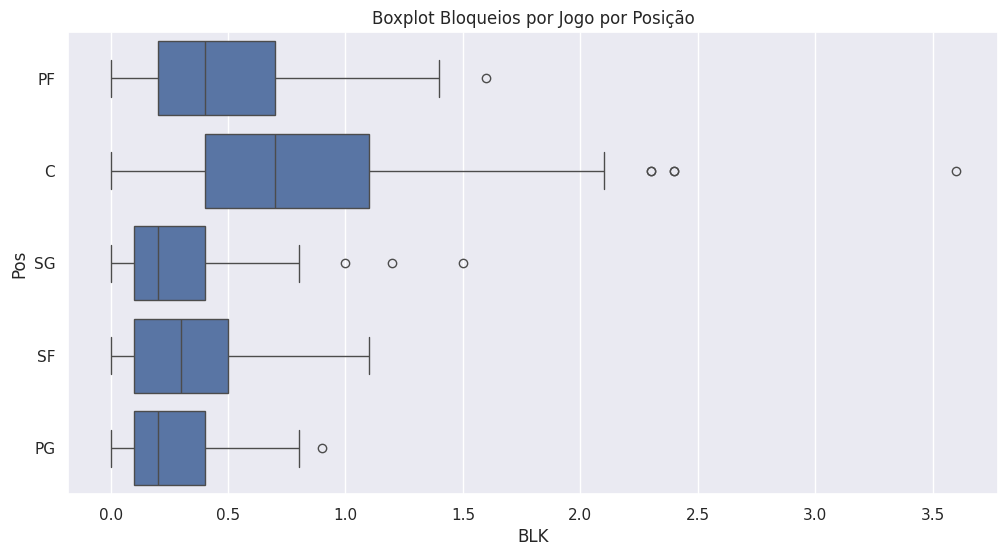

In [ ]:
ax = sns.boxplot(data=data, x='BLK', y='Pos')
ax.set_title('Boxplot Bloqueios por Jogo por Posição')
ax.figure.set_size_inches(12,6)

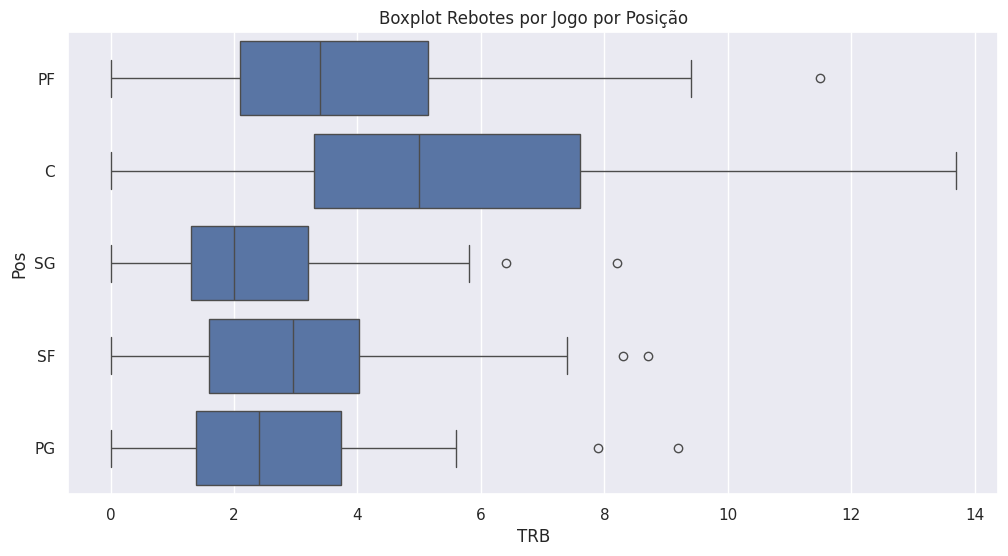

In [ ]:
ax = sns.boxplot(data=data, x='TRB', y='Pos')
ax.set_title('Boxplot Rebotes por Jogo por Posição')
ax.figure.set_size_inches(12,6)

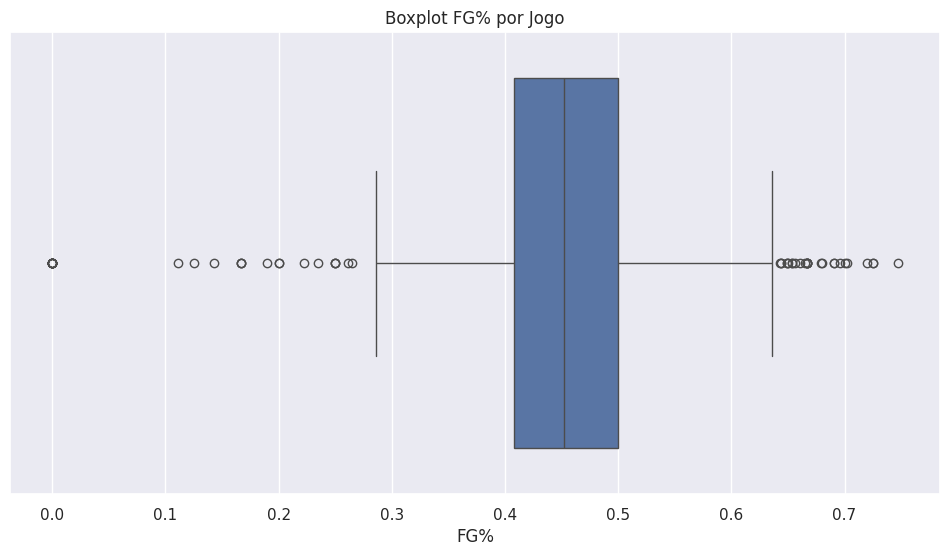

In [ ]:
ax = sns.boxplot(data=data, x='FG%')
ax.set_title('Boxplot FG% por Jogo')
ax.figure.set_size_inches(12,6)

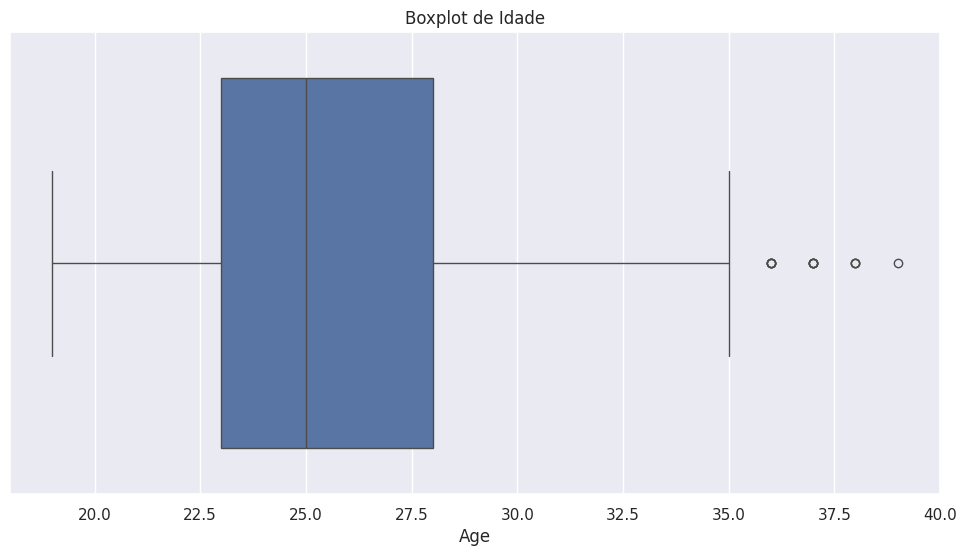

In [ ]:
ax = sns.boxplot(data=data, x='Age')
ax.set_title('Boxplot de Idade')
ax.figure.set_size_inches(12,6)

### **Histograma**

Text(0.5, 1.0, 'Histograma de Pontos por Partida')

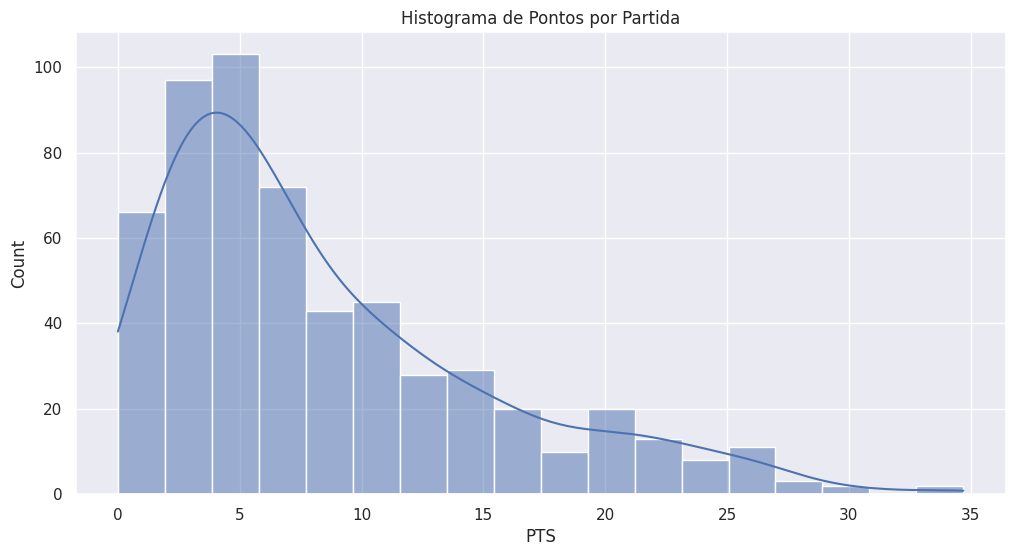

In [ ]:
ax = sns.histplot(data=data, x='PTS', kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de Pontos por Partida')

Text(0.5, 1.0, 'Histograma de Idade')

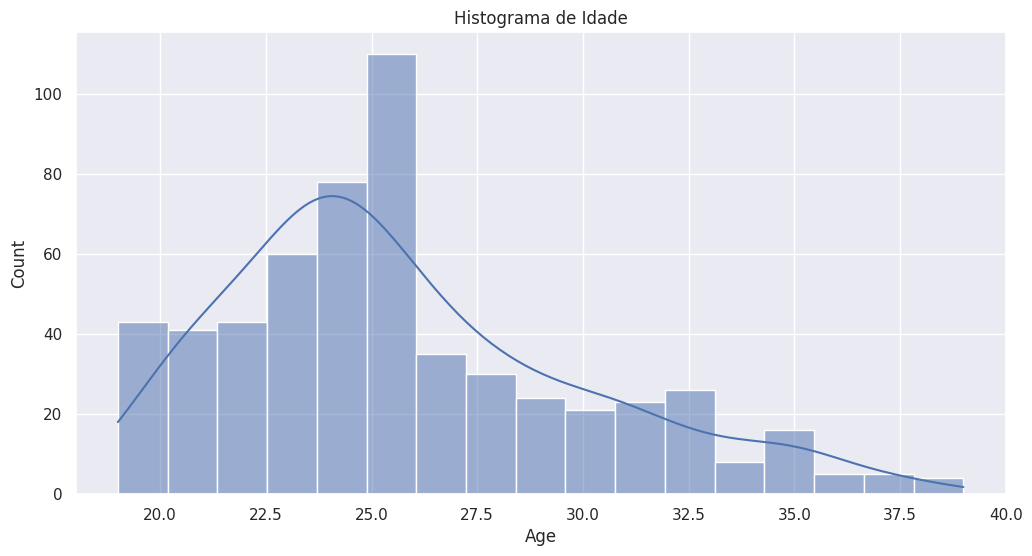

In [ ]:
ax = sns.histplot(data=data, x='Age', kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de Idade')

Text(0.5, 1.0, 'Histograma de FG%')

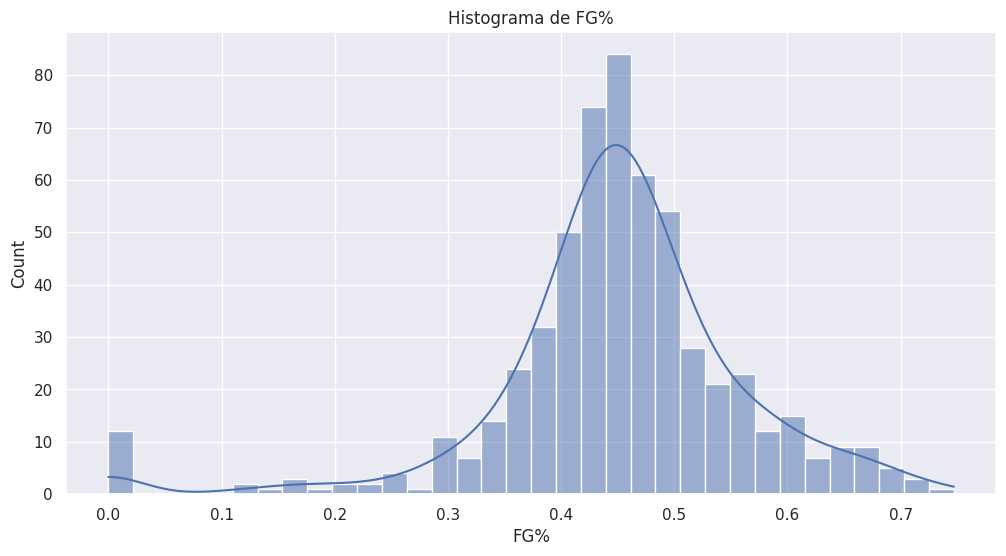

In [ ]:
ax = sns.histplot(data=data, x='FG%', kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma de FG%')

### **Scatterplot**

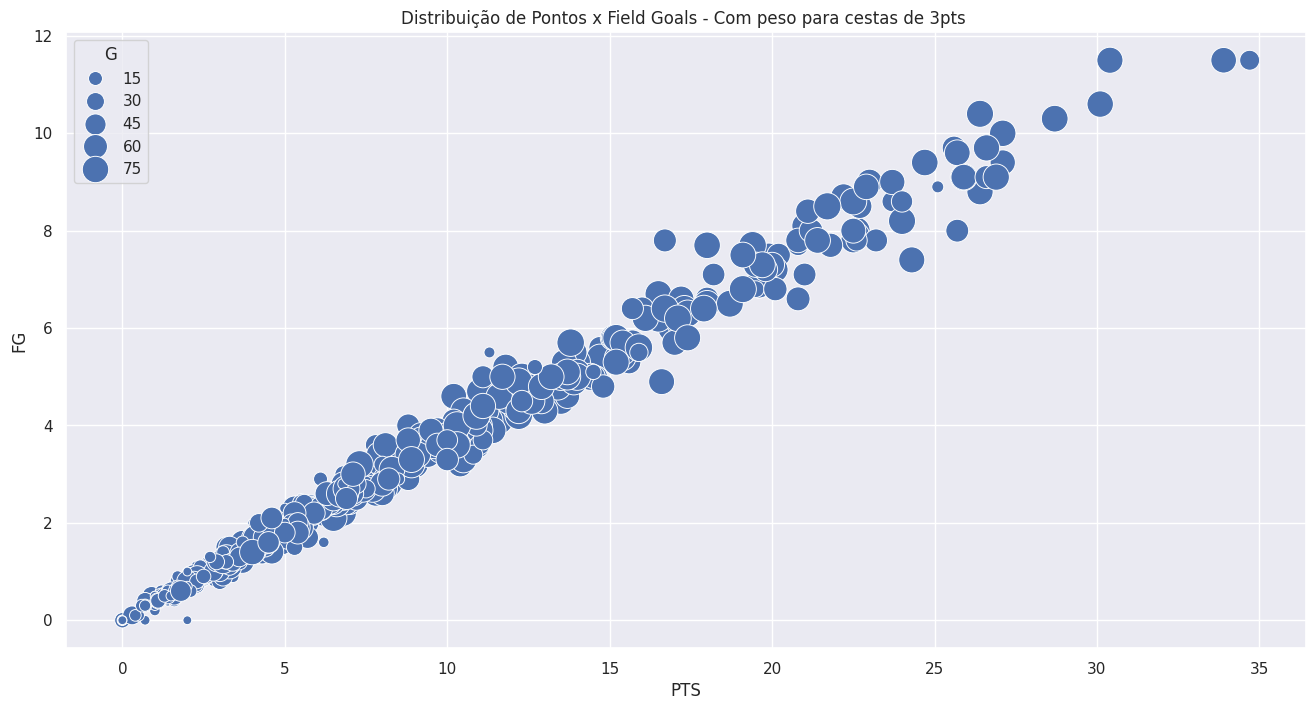

In [ ]:
ax = sns.scatterplot(data=data, x='PTS', y='FG', size='G', sizes=(40,400))
ax.set_title('Distribuição de Pontos x Field Goals - Com peso para cestas de 3pts ')
ax.figure.set_size_inches(16,8)

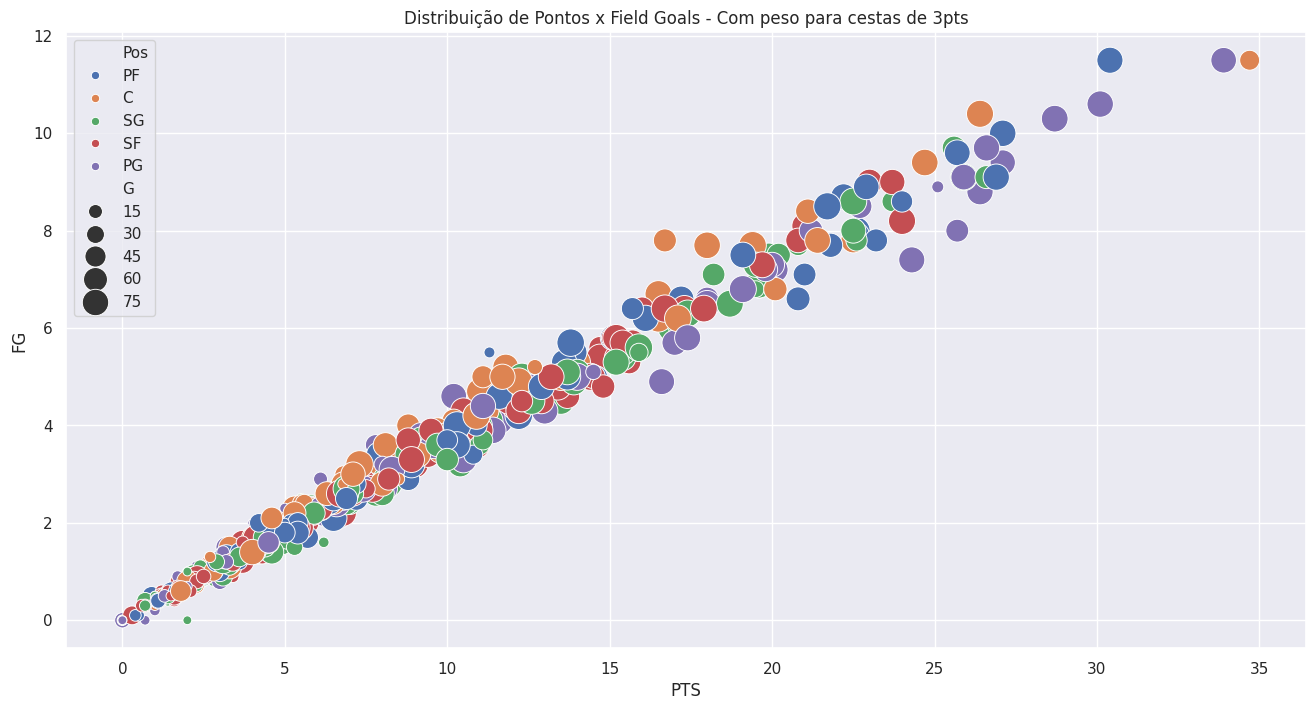

In [ ]:
ax = sns.scatterplot(data=data, x='PTS', y='FG', hue='Pos', size='G', sizes=(40,400))
ax.set_title('Distribuição de Pontos x Field Goals - Com peso para cestas de 3pts')
ax.figure.set_size_inches(16,8)

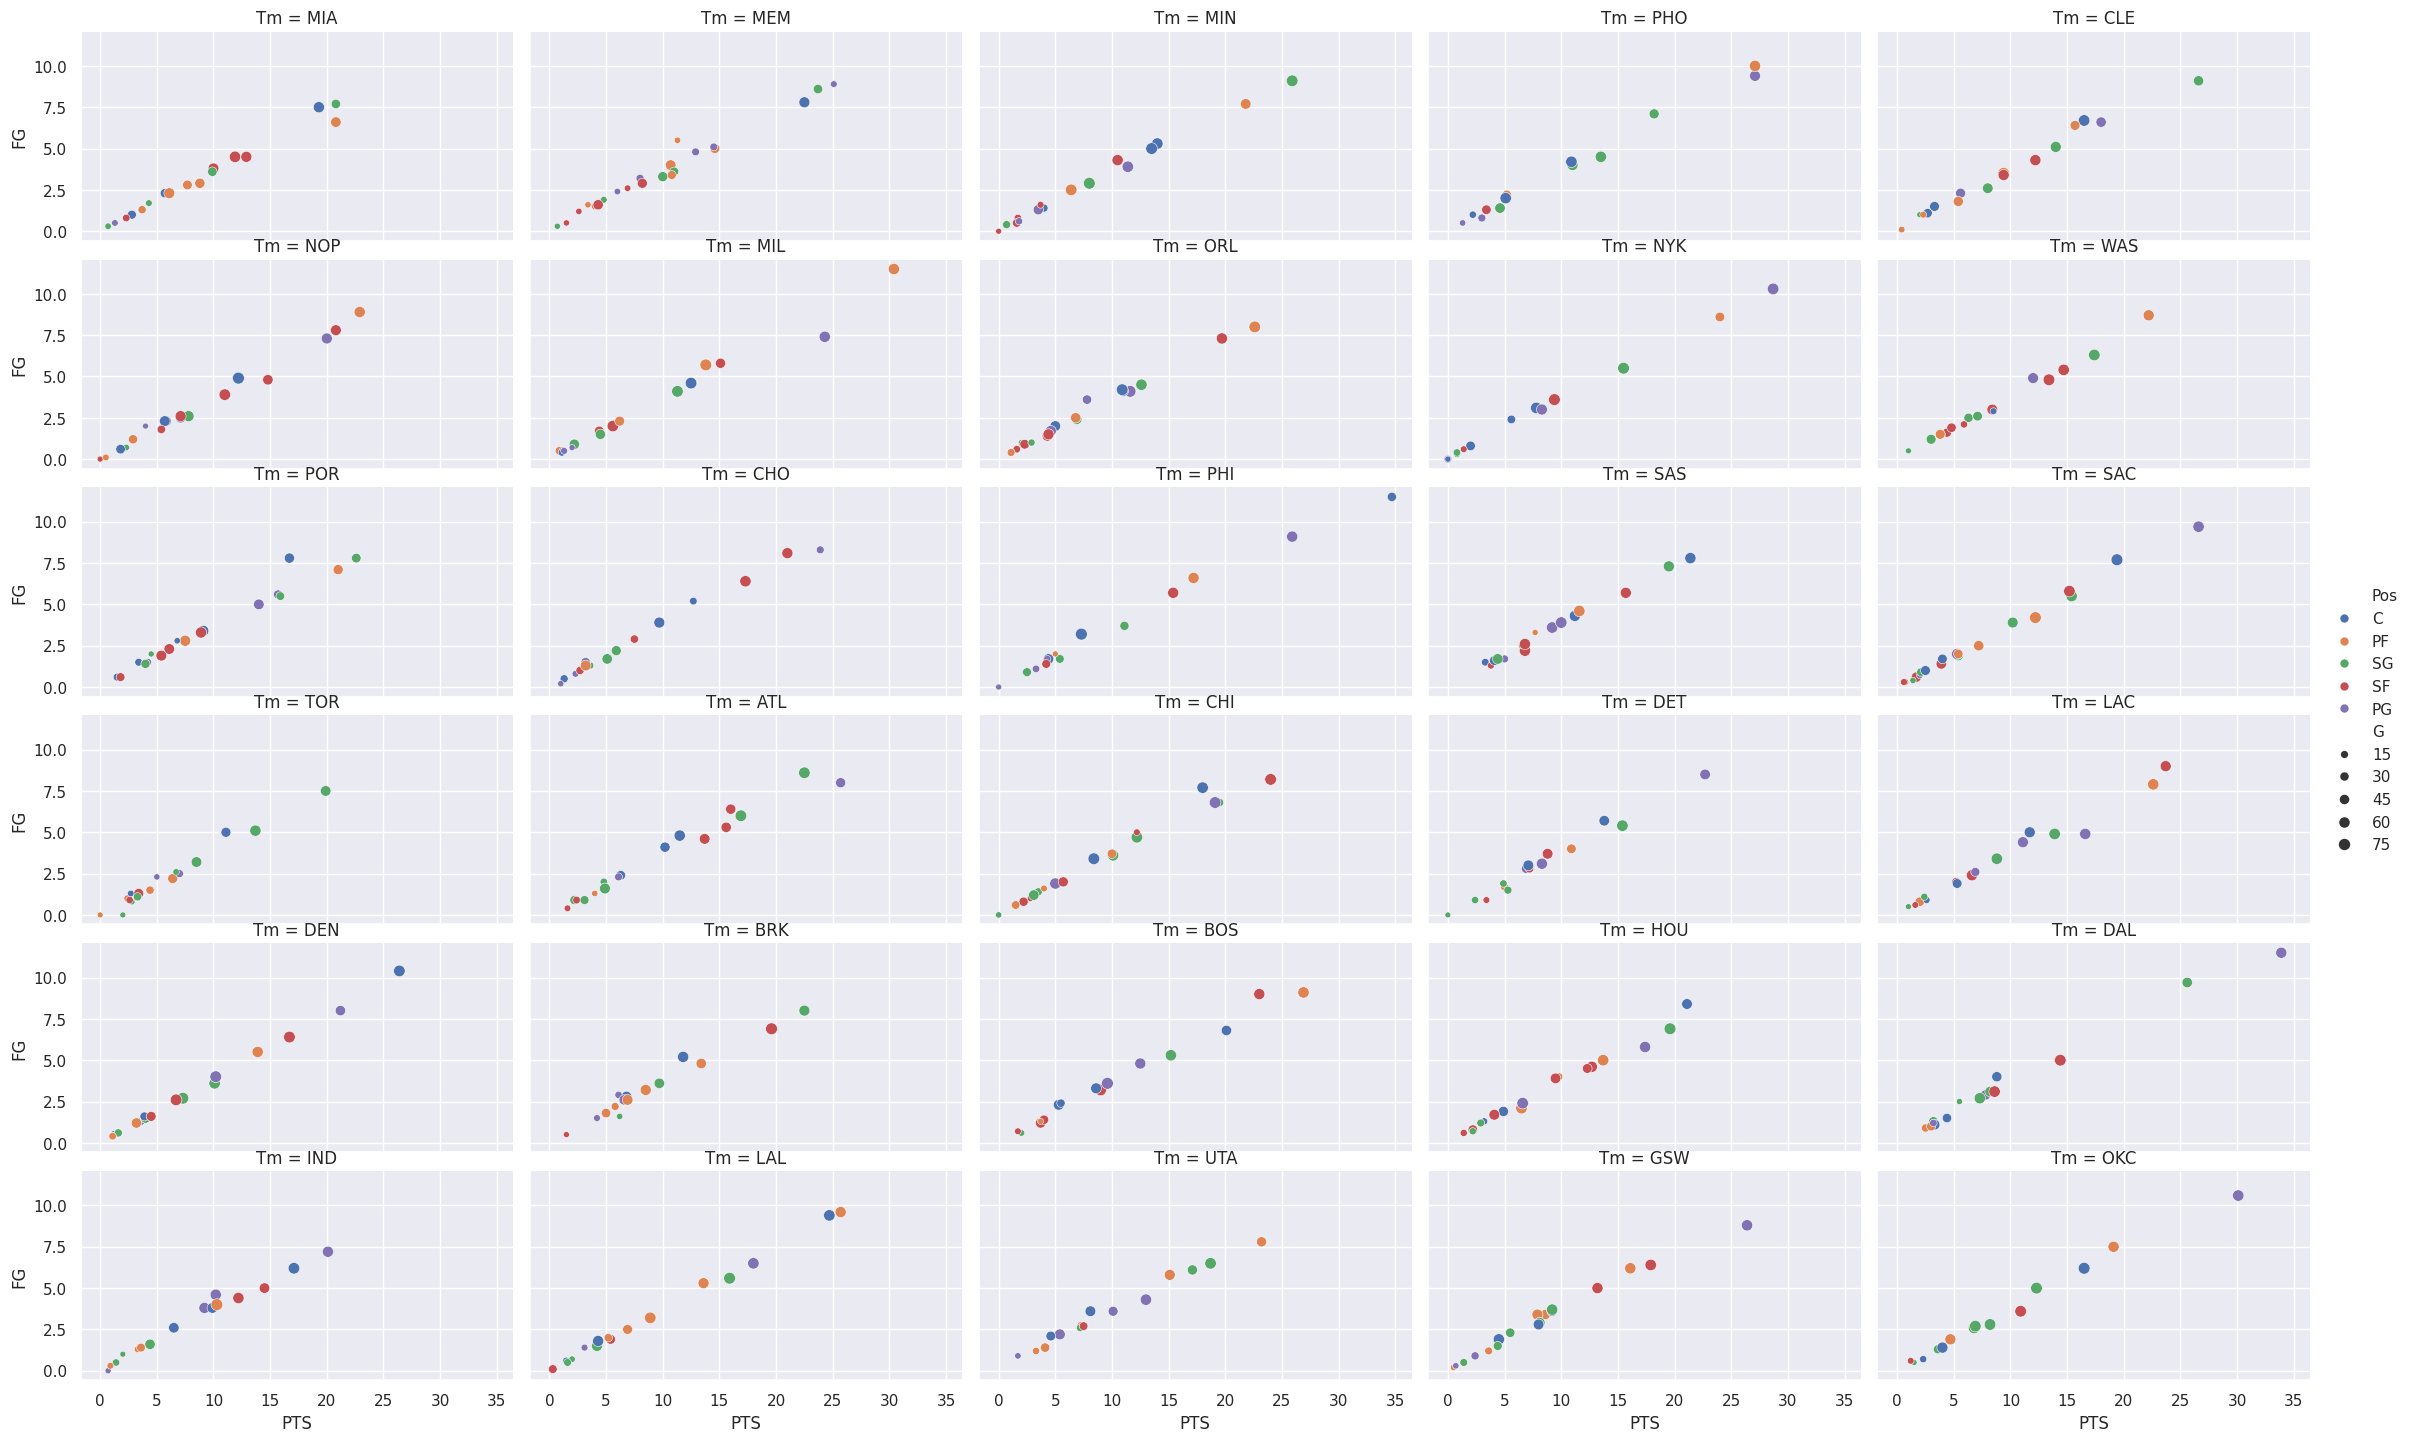

In [ ]:
ax = sns.relplot(
    data=data[data['Tm']!='TOT'], x='PTS', y='FG',
    col='Tm', hue='Pos',col_wrap=5,size='G',
    kind='scatter'
)
ax.figure.set_size_inches(24,14)

In [ ]:
data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

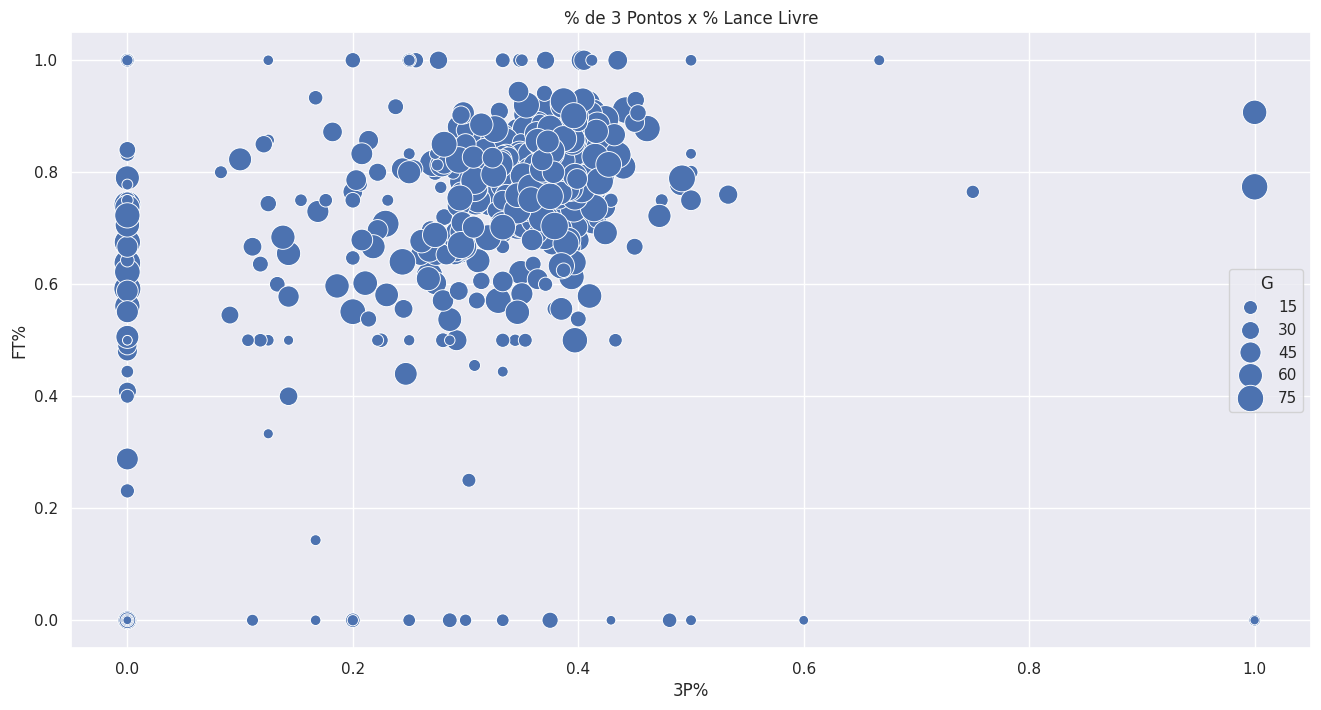

In [ ]:
ax = sns.scatterplot(data=data, x='3P%', y='FT%', size='G',sizes=(40,400))
ax.set_title('% de 3 Pontos x % Lance Livre')
ax.figure.set_size_inches(16,8)

### **Heatmap**

In [ ]:
data['Pos'] = data['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5})

In [ ]:
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,4,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,2,Bam Adebayo,5,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
2,3,Ochai Agbaji,2,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
3,4,Santi Aldama,4,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
4,5,Nickeil Alexander-Walker,2,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0


In [ ]:
data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
data[['Pos', 'G', 'MP', '3P%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']].corr()

,Pos,G,MP,3P%,TRB,AST,STL,BLK,PTS
Pos,1.000000,0.071314,-0.024436,-0.177883,0.417950,-0.312449,-0.138982,0.457071,-0.034620
G,0.071314,1.000000,0.701449,0.359815,0.508848,0.466454,0.485232,0.344270,0.591923
MP,-0.024436,0.701449,1.000000,0.318567,0.718441,0.748452,0.768405,0.461688,0.892276
3P%,-0.177883,0.359815,0.318567,1.000000,0.022637,0.265089,0.262259,-0.020380,0.298978
TRB,0.417950,0.508848,0.718441,0.022637,1.000000,0.451020,0.517584,0.700256,0.664955
AST,-0.312449,0.466454,0.748452,0.265089,0.451020,1.000000,0.667829,0.190506,0.781182
STL,-0.138982,0.485232,0.768405,0.262259,0.517584,0.667829,1.000000,0.357374,0.678790
BLK,0.457071,0.344270,0.461688,-0.020380,0.700256,0.190506,0.357374,1.000000,0.402661
PTS,-0.034620,0.591923,0.892276,0.298978,0.664955,0.781182,0.678790,0.402661,1.000000


Text(0.5, 1.0, 'Mapa de Calor de Correlação')

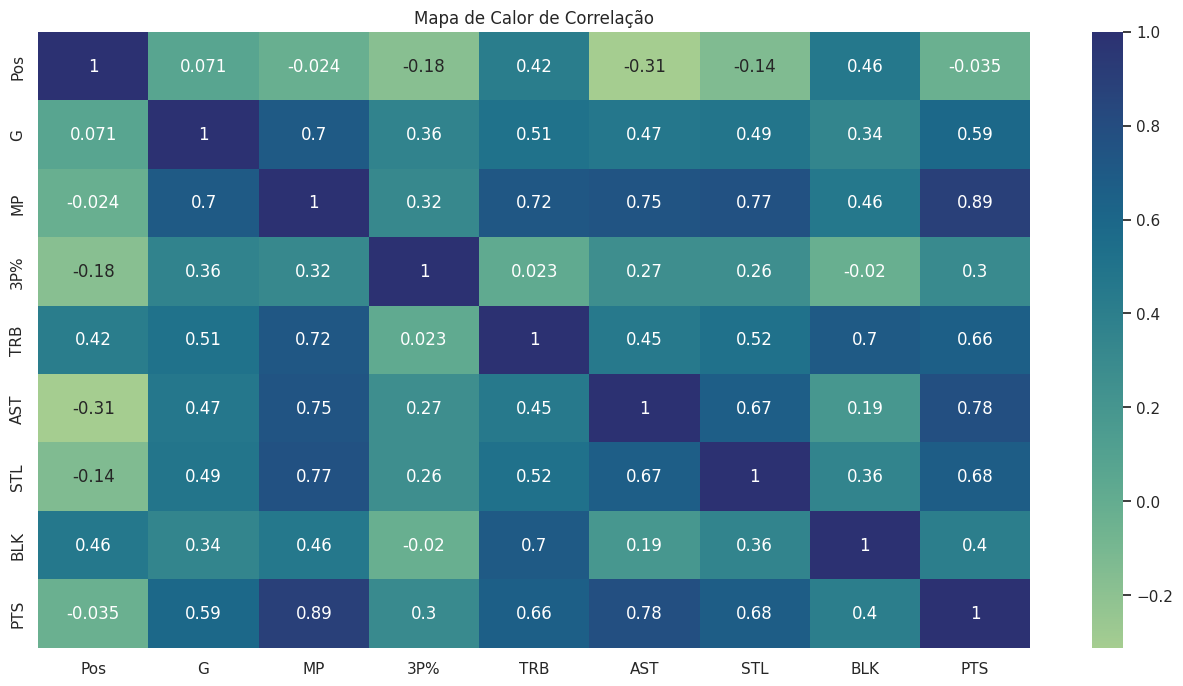

In [ ]:
ax = sns.heatmap(data[['Pos', 'G', 'MP', '3P%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']].corr(), annot=True, cmap='crest')
ax.figure.set_size_inches(16,8)
ax.set_title('Mapa de Calor de Correlação')

## **3° Questão**

In [ ]:
np.random.seed(50)

In [ ]:
data_n = data.drop(np.random.randint(0, len(data), 2))

In [ ]:
def dividir_lista(lista, n):
    return [lista[i:i + n] for i in range(0, len(lista), n)]

In [ ]:
def plot_hist(n, x):
  data_random = data_n.iloc[np.random.choice(len(data_n), n)]
  ax = sns.histplot(data=data_random, x=x, kde=True)
  ax.figure.set_size_inches(12,6)
  ax.set_title(f'Distribuição de {x} Amostra de n={n}')

### **Análise de Assistências**

In [ ]:
data_n['AST'].mean(), data_n['AST'].std()

(2.004561403508772, 1.8758984445472033)

In [ ]:
array_c = np.random.choice(len(data_n), len(data_n))

In [ ]:
array_f = dividir_lista(array_c, 10)

In [ ]:
mean_f = []
for i in range(len(array_f)):
  mean_f.append(data_n.iloc[array_f[i]]['AST'].mean().round(4))

In [ ]:
np.mean(mean_f)

1.9357894736842105

In [ ]:
data_n.AST.std()

1.8758984445472033

In [ ]:
(data_n['AST'].std()/np.sqrt(10)) * (np.sqrt((len(data_n) - 10) / (len(data_n)-1)))

0.5885009979016265

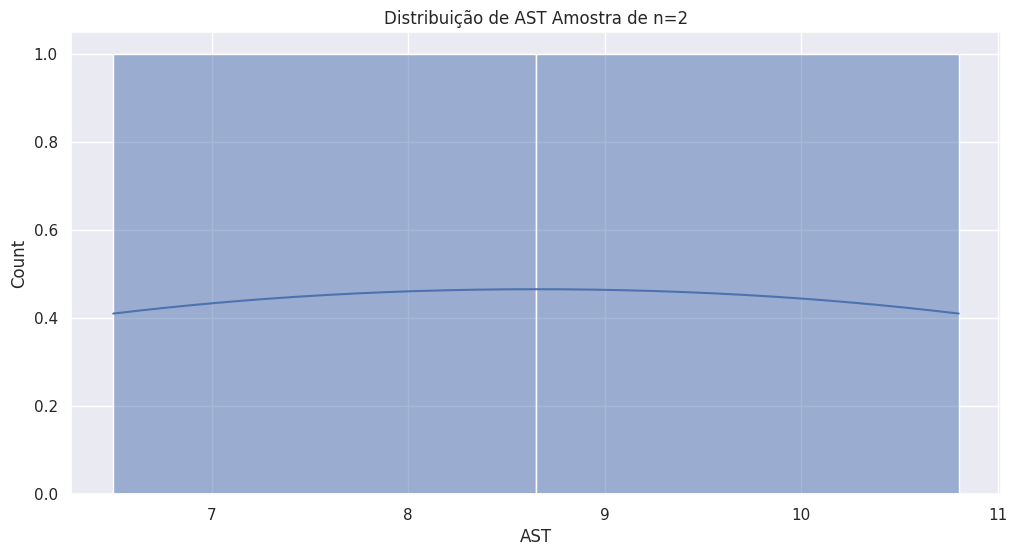

In [ ]:
plot_hist(2, 'AST')

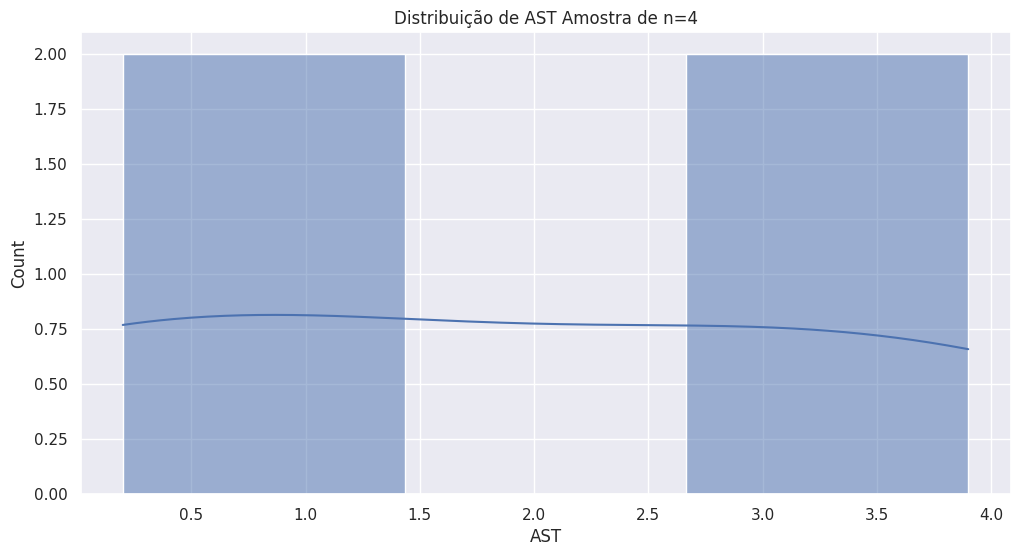

In [ ]:
plot_hist(4, 'AST')

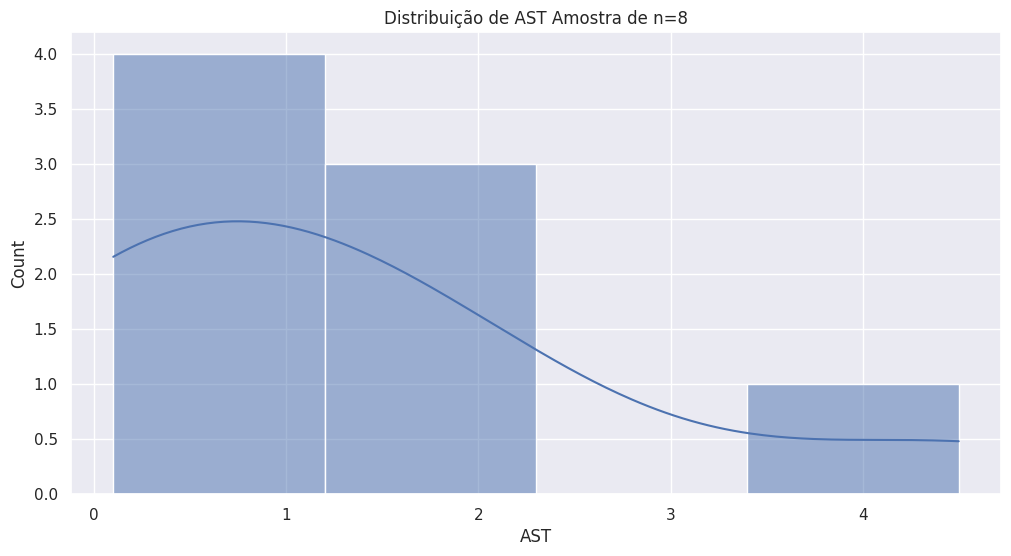

In [ ]:
plot_hist(8, 'AST')

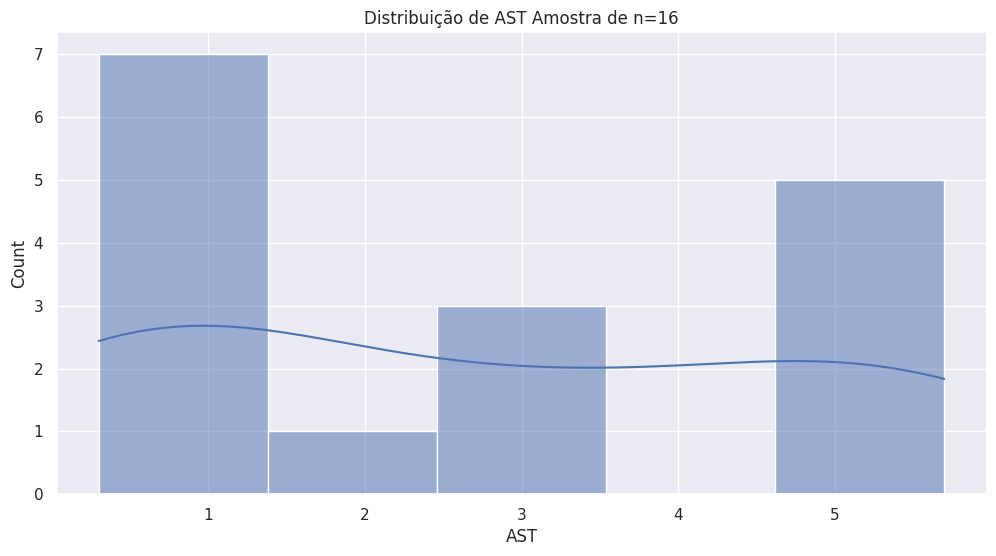

In [ ]:
plot_hist(16, 'AST')

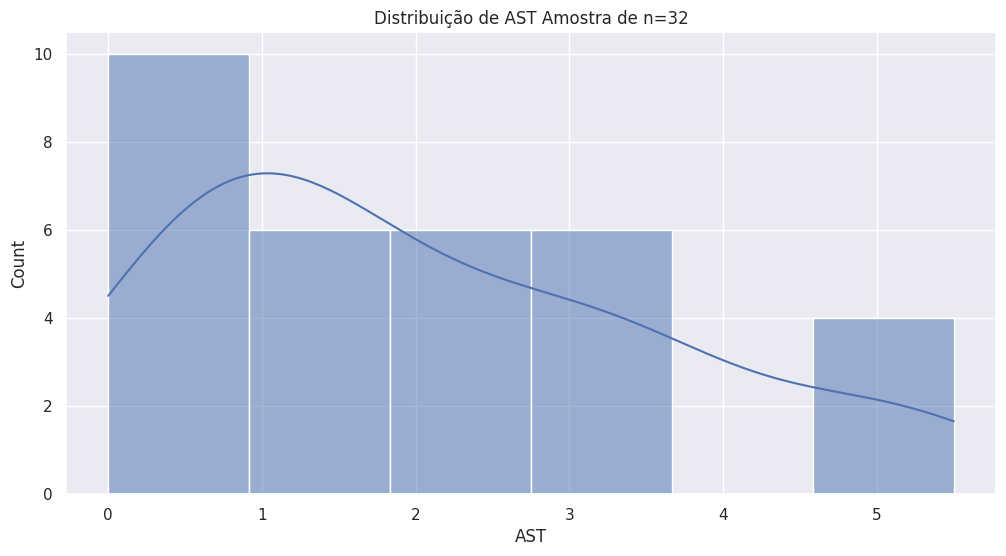

In [ ]:
plot_hist(32, 'AST')

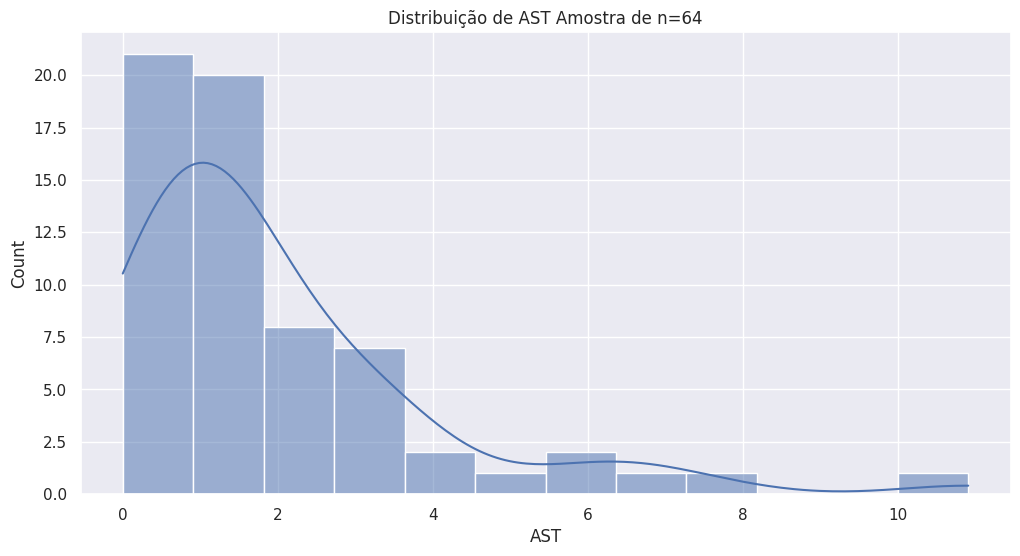

In [ ]:
plot_hist(64, 'AST')

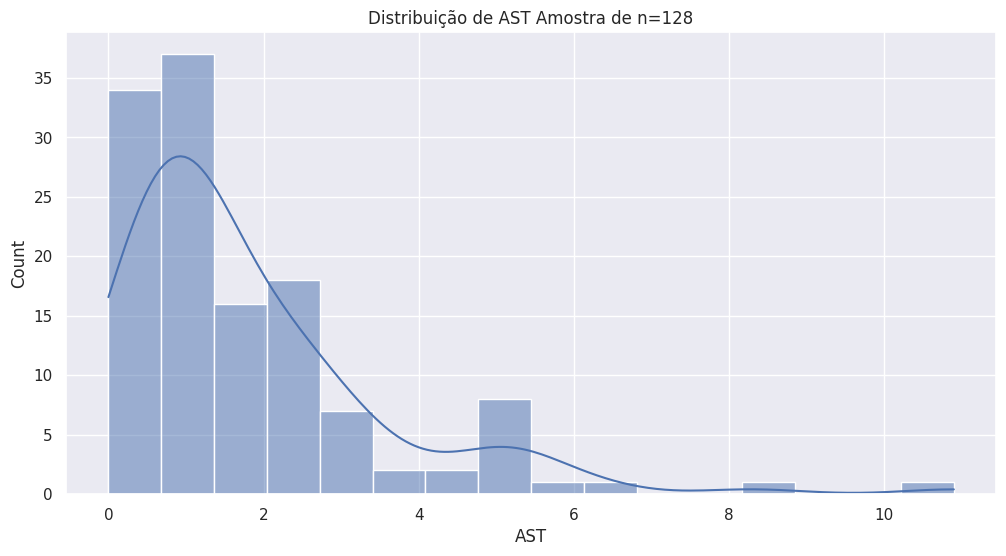

In [ ]:
plot_hist(128, 'AST')

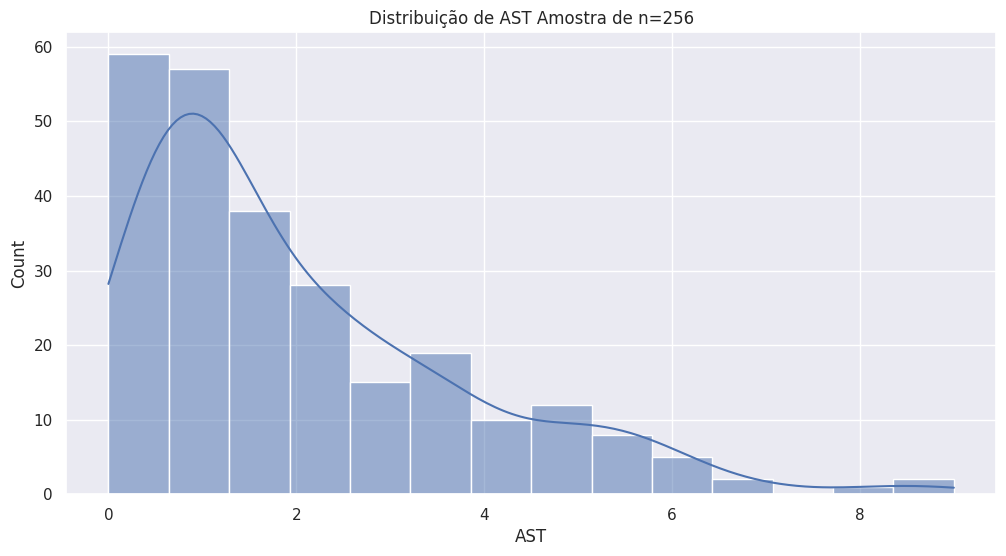

In [ ]:
plot_hist(256, 'AST')

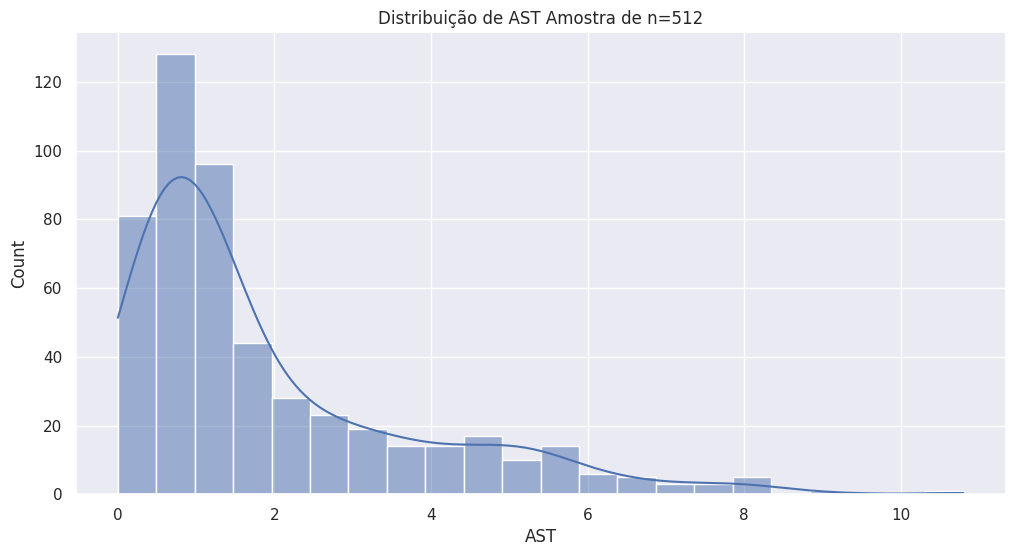

In [ ]:
plot_hist(512, 'AST')

### **Análise de Idade**

In [ ]:
data_n.Age.mean(), data_n.Age.std()

(25.73859649122807, 4.216890232008673)

In [ ]:
array_c_age = np.random.choice(len(data_n), len(data_n))

In [ ]:
array_f_age = dividir_lista(array_c_age, 5)

In [ ]:
mean_f_age = []
for i in range(len(array_f_age)):
  mean_f_age.append(data_n.Age.iloc[array_f_age[i]].mean())

In [ ]:
np.mean(mean_f_age)

25.82456140350877

In [ ]:
(data_n['Age'].std()/np.sqrt(5)) * (np.sqrt((len(data_n) - 5) / (len(data_n)-1)))

1.8792103027029183

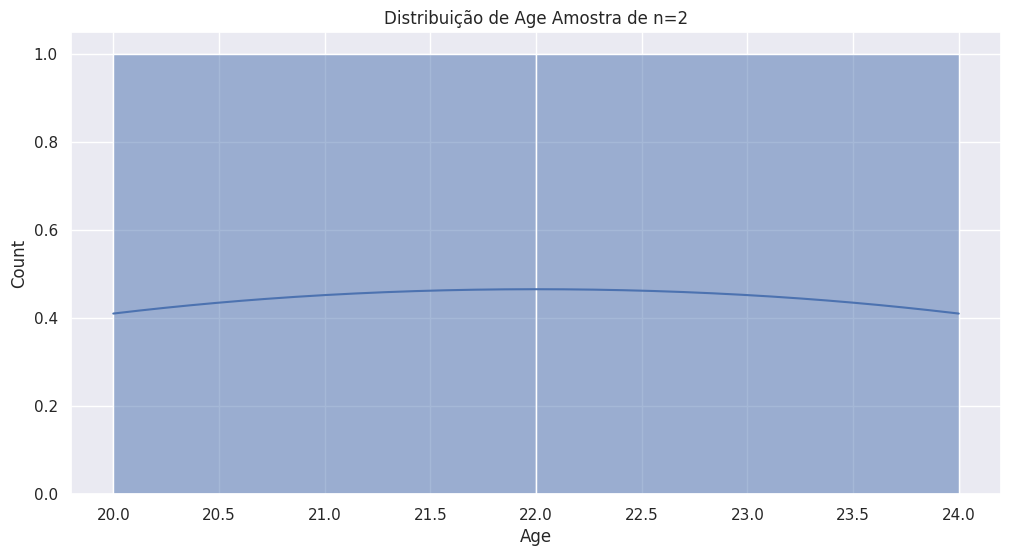

In [ ]:
plot_hist(2, 'Age')

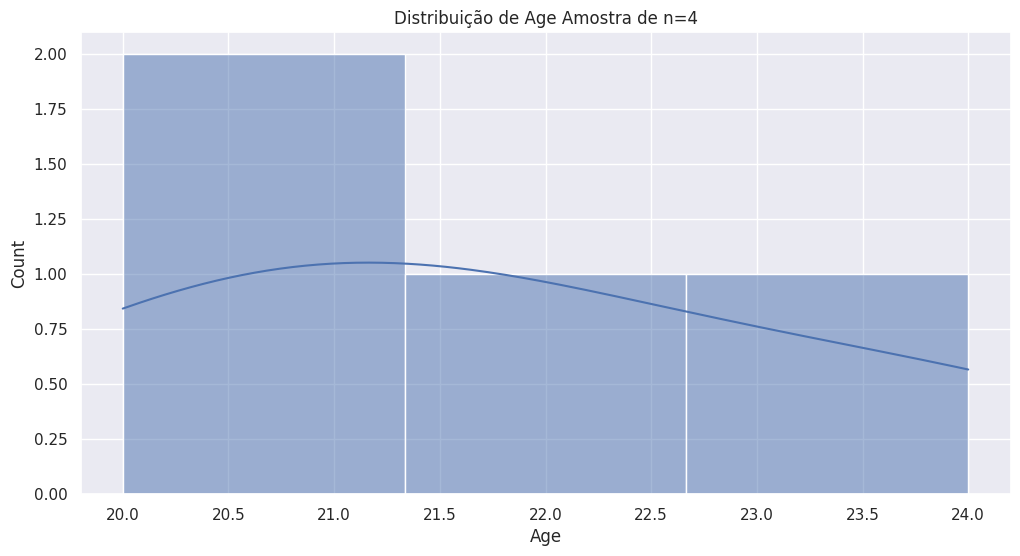

In [ ]:
plot_hist(4, 'Age')

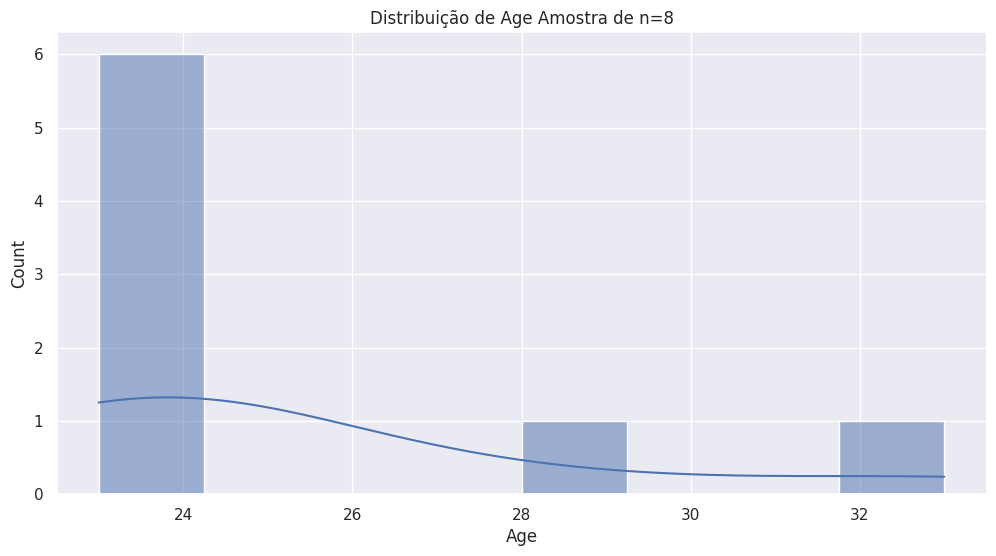

In [ ]:
plot_hist(8, 'Age')

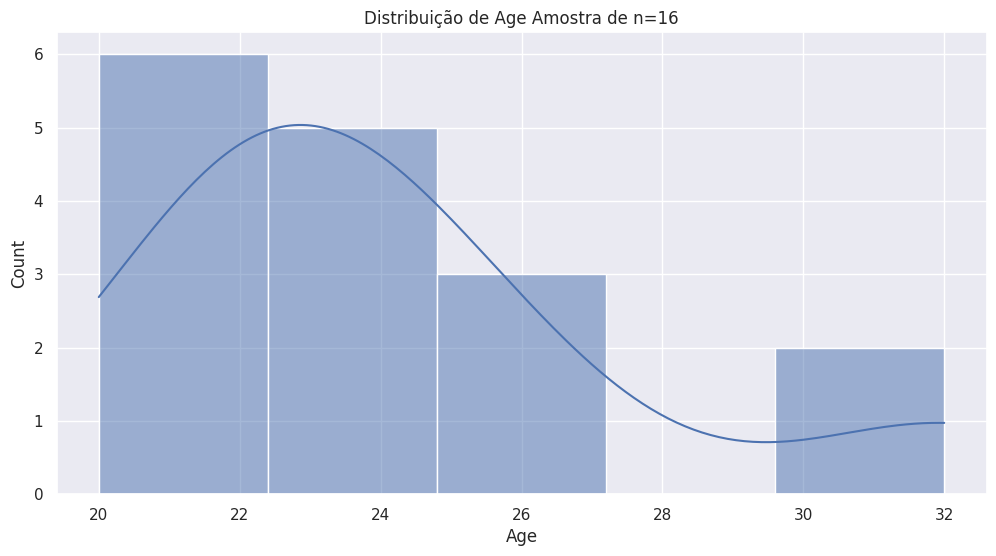

In [ ]:
plot_hist(16, 'Age')

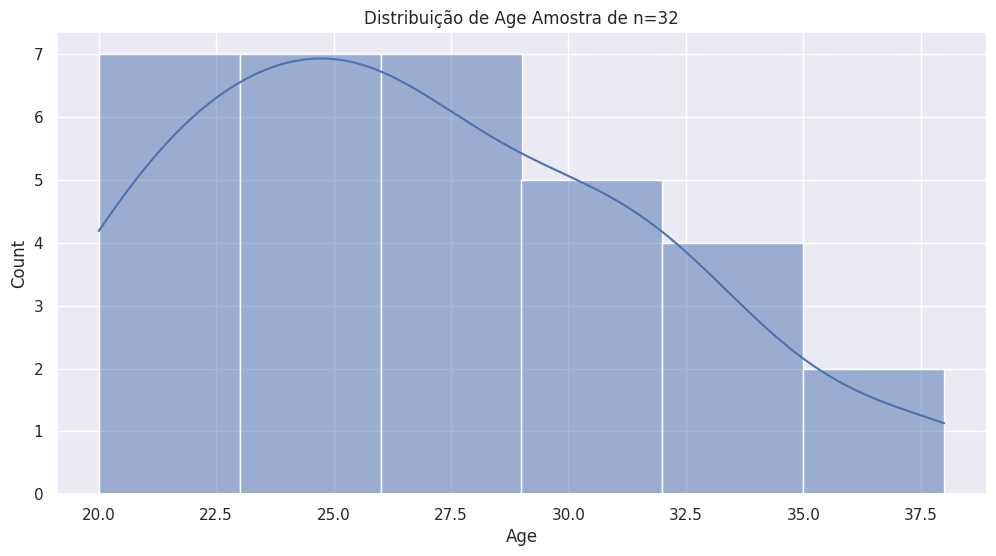

In [ ]:
plot_hist(32, 'Age')

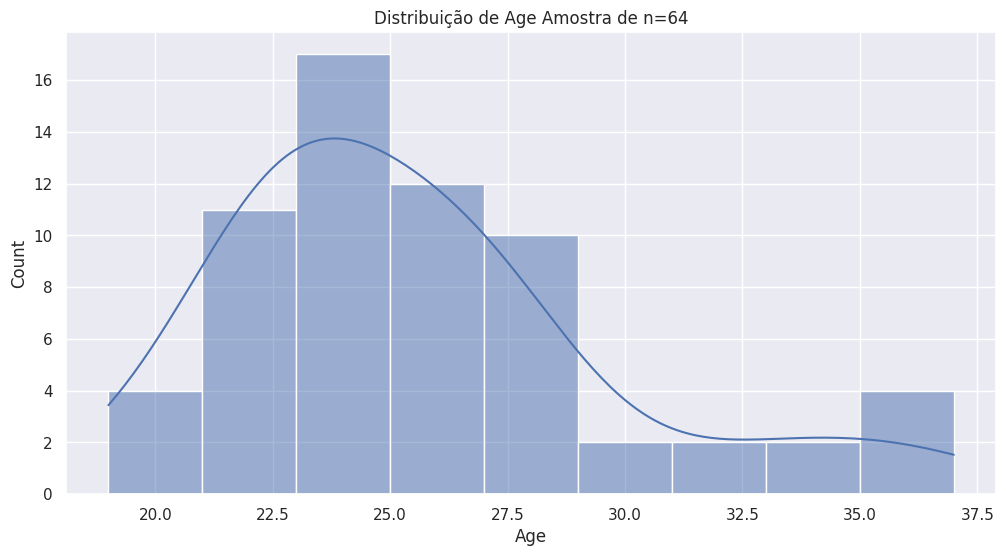

In [ ]:
plot_hist(64, 'Age')

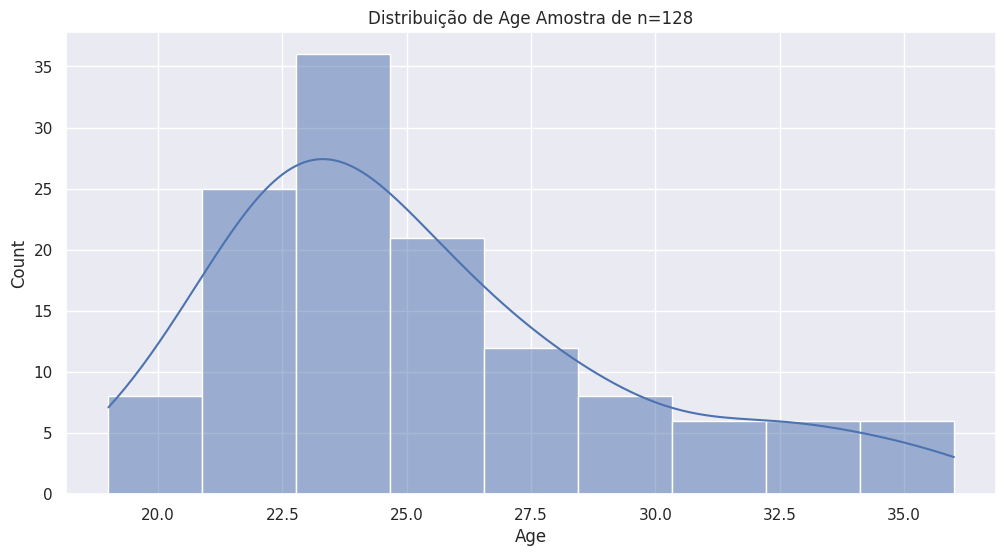

In [ ]:
plot_hist(128, 'Age')

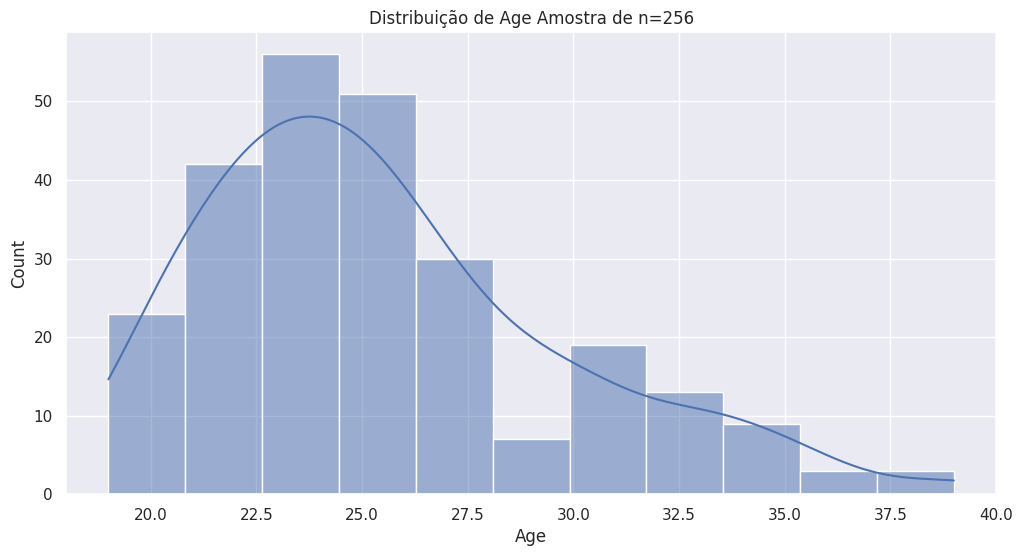

In [ ]:
plot_hist(256, 'Age')

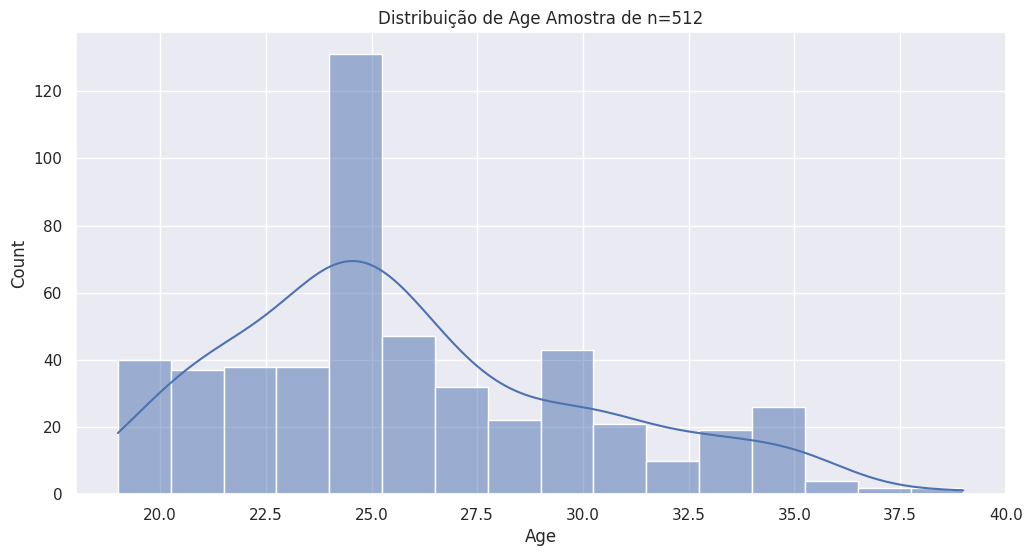

In [ ]:
plot_hist(512, 'Age')

### **Análise de FG%**

In [ ]:
data_n['FG%'].mean(), data_n['FG%'].std()

(0.44972105263157897, 0.11353034826776666)

In [ ]:
array_c_fg = np.random.choice(len(data_n), len(data_n))

In [ ]:
array_f_fg = dividir_lista(array_c_fg, 10)

In [ ]:
mean_f_fg = []
for i in range(len(array_f_fg)):
  mean_f_fg.append(data_n.iloc[array_f_fg[i]]['FG%'].mean().round(4))

In [ ]:
np.mean(mean_f_fg)

0.4483245614035088

In [ ]:
# Média das médias amostrais e média da população
np.mean(mean_f_fg), data_n['FG%'].mean()

(0.4483245614035088, 0.44972105263157897)

In [ ]:
# Desvio padrão das médias amostrais e desvio padrão da população
(data_n['FG%'].std()/np.sqrt(10)) * (np.sqrt((len(data_n) - 10) / (len(data_n)-1))), data_n['FG%'].std()

(0.035616386079912146, 0.11353034826776666)

<Axes: xlabel='FG%', ylabel='Count'>

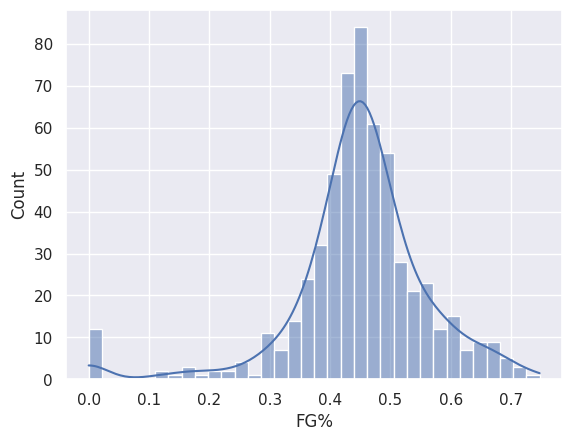

In [ ]:
sns.histplot(data=data_n, x='FG%', kde=True)

In [ ]:
data['FG%'].mean(), data['FG%'].std()

(0.44958391608391607, 0.11335707552233863)

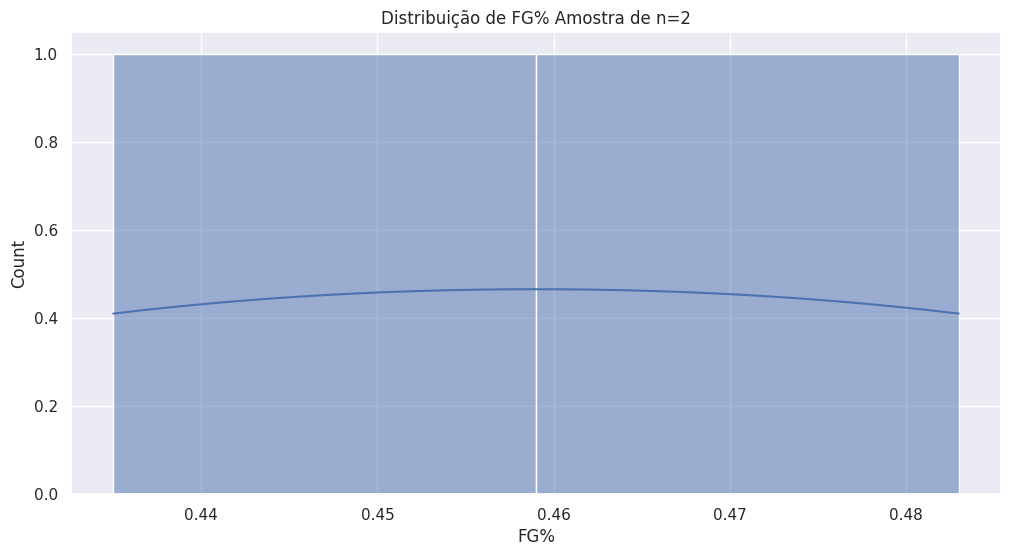

In [ ]:
plot_hist(2, 'FG%')

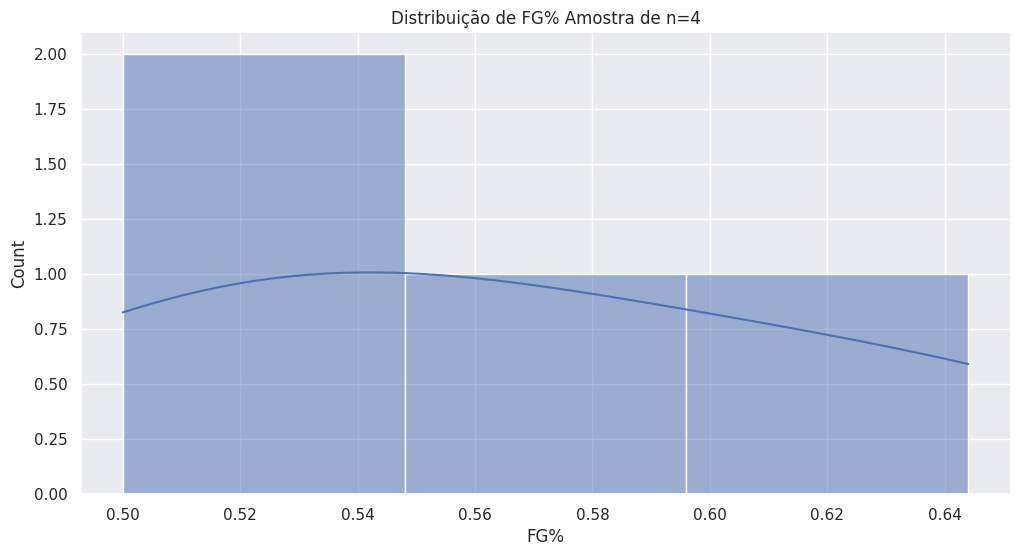

In [ ]:
plot_hist(4, 'FG%')

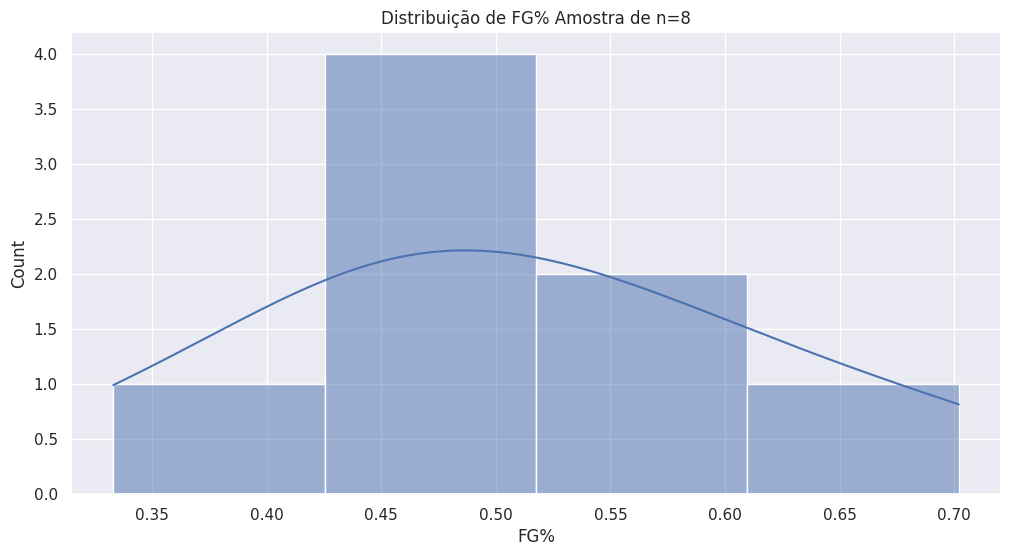

In [ ]:
plot_hist(8, 'FG%')

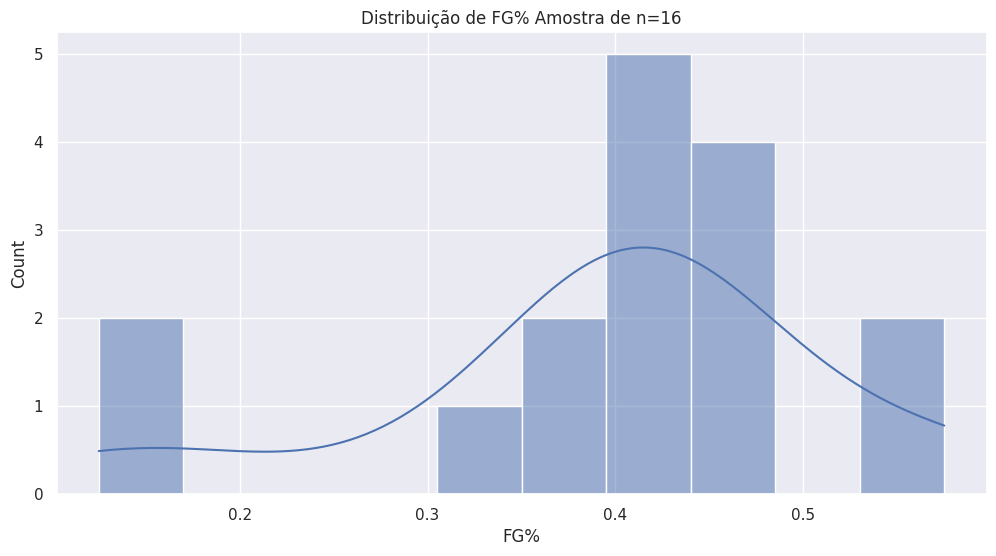

In [ ]:
plot_hist(16, 'FG%')

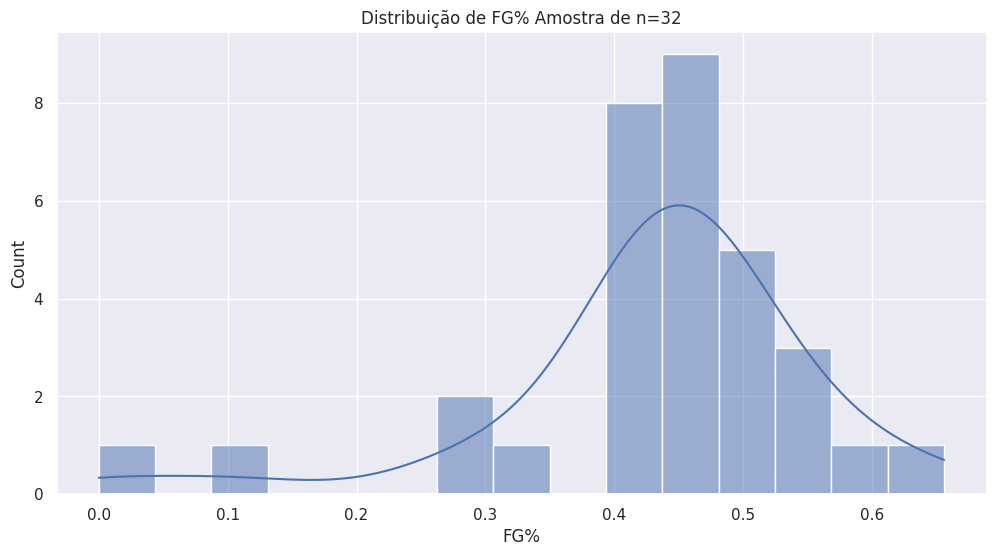

In [ ]:
plot_hist(32, 'FG%')

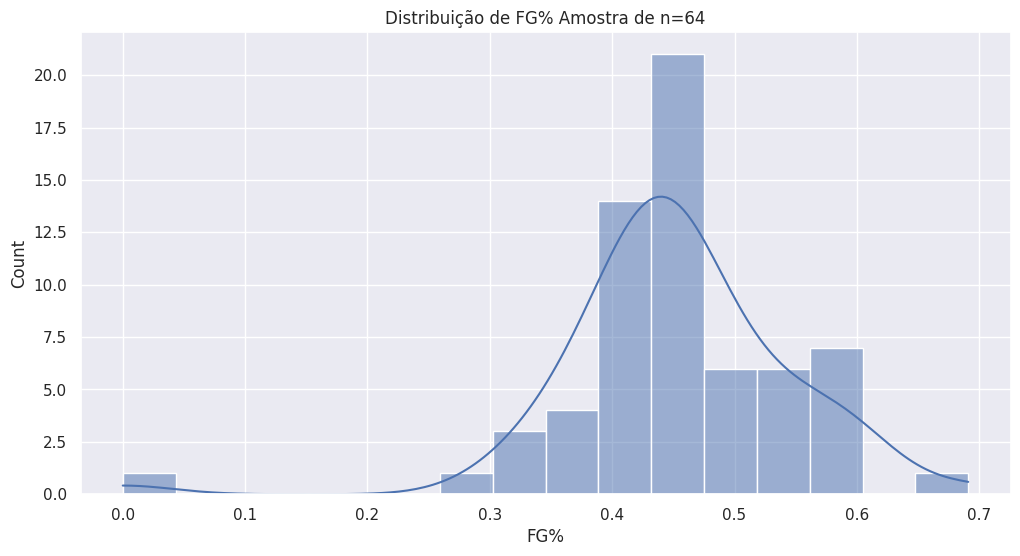

In [ ]:
plot_hist(64, 'FG%')

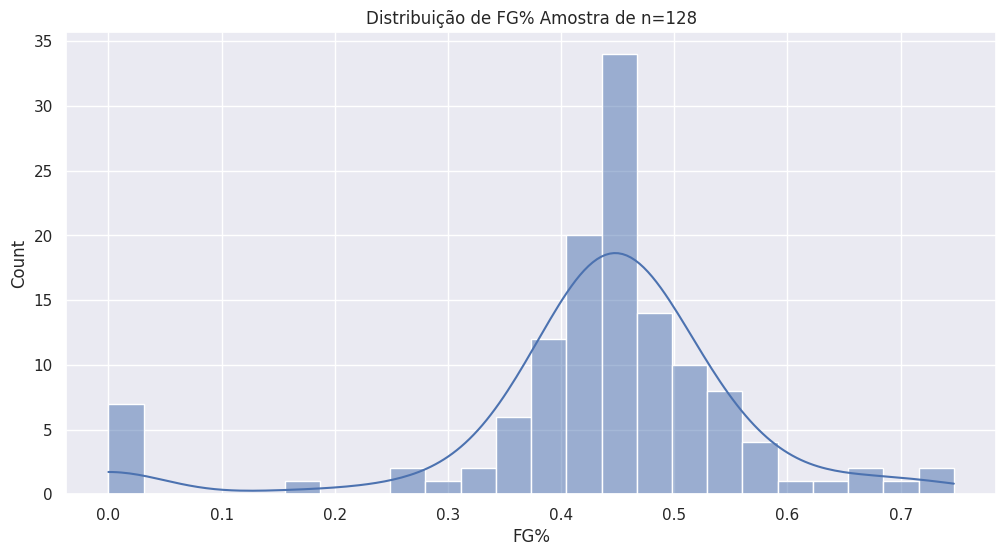

In [ ]:
plot_hist(128, 'FG%')

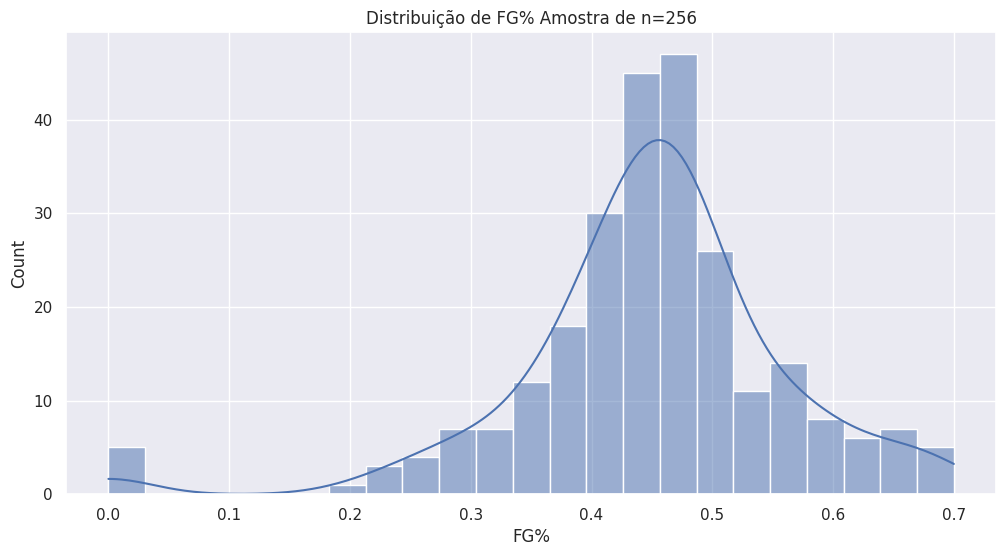

In [ ]:
plot_hist(256, 'FG%')

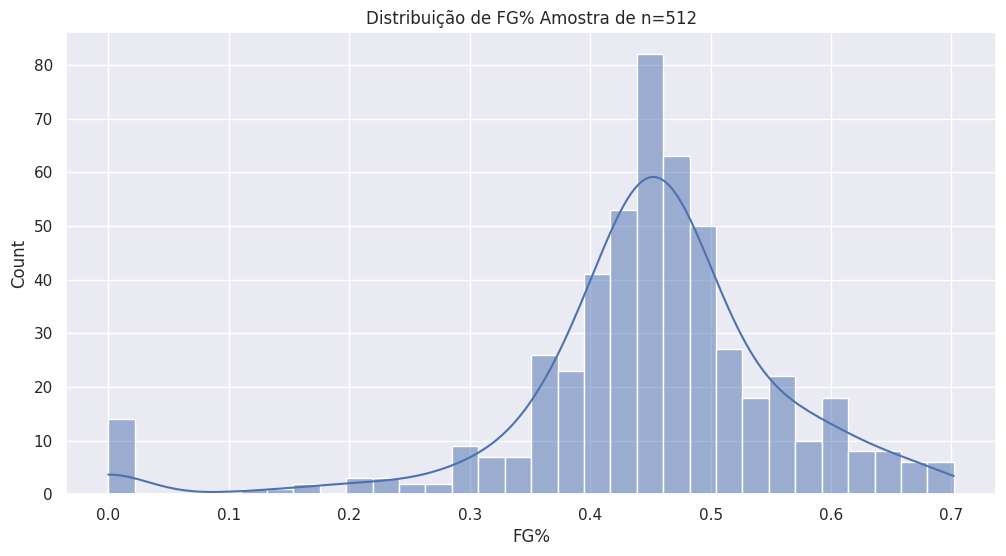

In [ ]:
plot_hist(512, 'FG%')

## **Intervalo de Confiança - Extra**

### **IC = 90%**

In [ ]:
# Faremos Intervalo de Confiança para Assistências
z_90 = 1.64
x = data_n['AST'].mean().round(3)
std_age = data_n['AST'].std()
n = len(data)

In [ ]:
x, std_age

(2.005, 1.8758984445472033)

In [ ]:
IC_90 = round(z_90 * (std_age/np.sqrt(n)), 3)

In [ ]:
IC_90

0.129

In [ ]:
print('Intervalo de Confiança de 90%:')
print(f'{x-IC_90} < u < {x+IC_90}')

Intervalo de Confiança de 90%:
1.876 < u < 2.134


### **IC = 95%**

In [ ]:
z_95 = 1.96

In [ ]:
IC_95 = round(z_95 * (std_age/np.sqrt(n)), 3)

In [ ]:
print('Intervalo de Confiança de 95%:')
print(f'{x-IC_95} < u < {x+IC_95}')

Intervalo de Confiança de 95%:
1.851 < u < 2.159
